In [19]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from scipy.special import zetac
from mpmath import zeta 
from matplotlib.lines import Line2D
def plot_loglog(ax, tot_clust):
    x = np.linspace(1, len(tot_clust), (len(tot_clust)))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, tot_clust)
    ax.plot(x, tot_clust, '+')

def plot_samplex(ax, clusters):
    list = np.zeros(len(clusters))
    for i in range(len(clusters)):
        list[i] = np.sum(clusters[i:])/np.sum(clusters)
    ax.set_xscale('log')
    ax.set_yscale('log')
    x = np.linspace(1, len(list), len(list))
    ax.plot(x, list)
    return x, list

def plot_ccdf1(ax, tot_clust):
    N = len(tot_clust)
    x = np.sort(tot_clust) 
    y = np.arange(N) / float(N)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, 1-y)

def plot_ccdf2(ax, tot_clust, dens=False):
    count, bins_count = np.histogram(tot_clust, bins=np.logspace(0, np.log10(len(tot_clust)), 5000), density=dens)
    pdf = count / sum(count) 
    cdf = np.cumsum(pdf)
    ccdf = 1 - cdf
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(bins_count[1:], ccdf)
    return bins_count[1:], ccdf

def pl(x, a, b):
    return a * np.power(x, -b)

def fit_pl(x, y):
    return scipy.optimize.curve_fit(power_law, x, y)

def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = amount[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]



<font size= "7"> 2D Growth </font>


(0.001, 100)

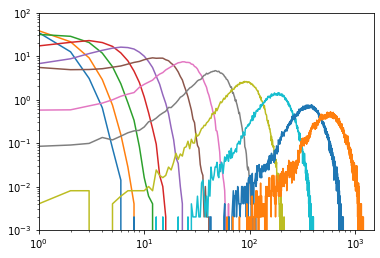

In [41]:
dens_list = ["0.028800", "0.050000", "0.100000", "0.200000", "0.400000", "0.800000", "1.600000", "3.200000", "6.400000", "12.800000", "25.600000", "40.000000"]
for i in dens_list:
    size, amount = np.loadtxt("2D_r3.000000_{}.txt".format(i), skiprows=1, unpack=True)
    amount = amount[1:]/500
    size = size[1:]
    plt.loglog(size, amount)
plt.xlim(1, 1500)    
plt.ylim(0.001, 100)

#de 40 hier bij overdensity moeten er af getrokken worden


<font size="7"> 3D Growth </font>

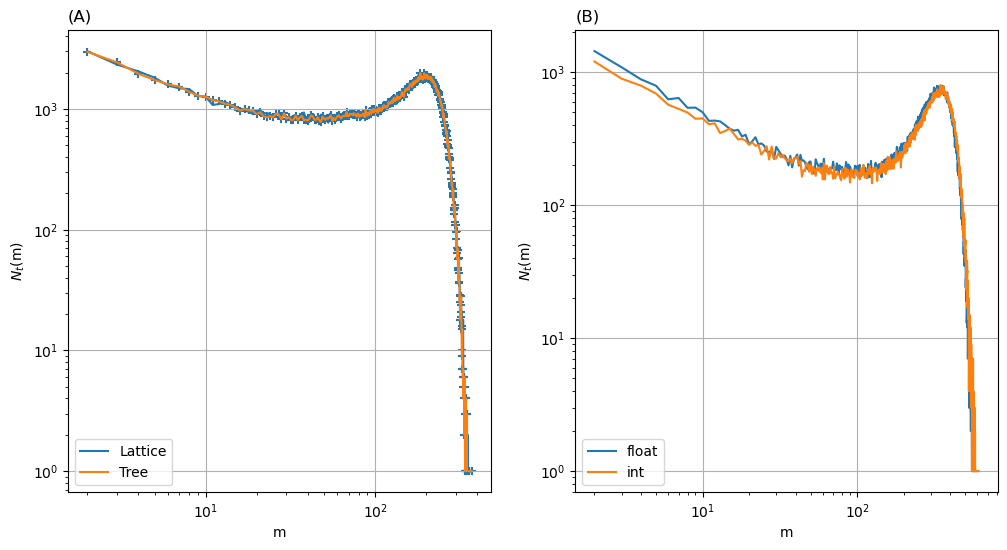

In [13]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))
size, amount = np.loadtxt("Pref_growth/not usefull/3D_r5.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax1.loglog(size, amount, label="Lattice")


size, amount = np.loadtxt("Pref_growth/not usefull/3D_tree_r5.000000_0.800000.txt", skiprows=1, unpack=True)

size = size[1:]
amount = amount[1:]
ax1.loglog(size, amount, label="Tree")
ax1.scatter(size, amount, marker='+')

ax1.legend(loc="lower left")
ax1.set_xlabel("m")
ax1.set_ylabel(r"$N_t$(m)")


size, amount = np.loadtxt("Pref_growth/not usefull/3D_tree_r6.000000_0.800000_float.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax2.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/not usefull/3D_tree_r6.000000_0.800000_int.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax2.loglog(size, amount, label="int")



ax2.legend(loc="lower left")
ax2.set_xlabel("m")
ax2.set_ylabel(r"$N_t$(m)")

ax1.set_title("(A)", loc="left")
ax2.set_title("(B)", loc="left")
ax1.grid()
ax2.grid()

fig.savefig("finalplot/growth_sanitychecks.jpeg",bbox_inches='tight', pad_inches=0.2)




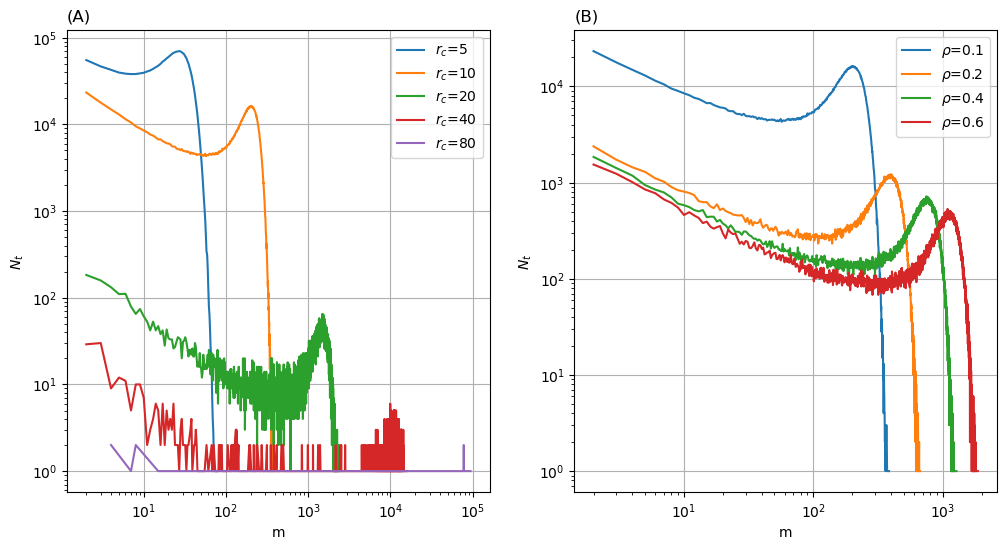

In [10]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))
size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r5.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax1.loglog(size, amount, label=r'$r_c$=5')

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r10.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax1.loglog(size, amount, label=r'$r_c$=10')

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r20.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax1.loglog(size, amount, label=r'$r_c$=20')

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r40.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax1.loglog(size, amount, label=r'$r_c$=40')

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r80.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax1.loglog(size, amount, label=r'$r_c$=80')

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r10.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax2.loglog(size, amount, label=r'$\rho$=0.1')

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r10.000000_0.200000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax2.loglog(size, amount, label=r'$\rho$=0.2')

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r10.000000_0.400000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax2.loglog(size, amount, label=r'$\rho$=0.4')

size, amount = np.loadtxt("Pref_growth/3D/3D_c0.00_r10.000000_0.600000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax2.loglog(size, amount, label=r'$\rho$=0.6')


ax1.legend()
ax2.legend()

ax1.grid()
ax2.grid()

ax1.set_xlabel("m")
ax1.set_ylabel(r"$N_t$")
ax1.set_title("(A)", loc="left")
ax2.set_xlabel("m")
ax2.set_ylabel(r"$N_t$")
ax2.set_title("(B)", loc="left")
fig.savefig("finalplot/growth_rad_dens.jpeg", bbox_inches='tight', pad_inches=0.2)

In [32]:
plt.figure(figsize=(8, 8))
size, amount = np.loadtxt("Pref_growth/2D_c0.00_r10.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.1")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r10.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.25")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r10.000000_0.500000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.5")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r10.000000_0.750000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.75")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r10.000000_0.850000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.85")

plt.legend()
plt.title("Cluster size distribution: r=10, Iterations=500")
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.legend()

FileNotFoundError: Pref_growth/2D_c0.00_r10.000000_0.100000.txt not found.

<Figure size 800x800 with 0 Axes>

Text(0.5, 1.0, 'Cluster size distribution: r=5, Density=0.5, Iterations=50')

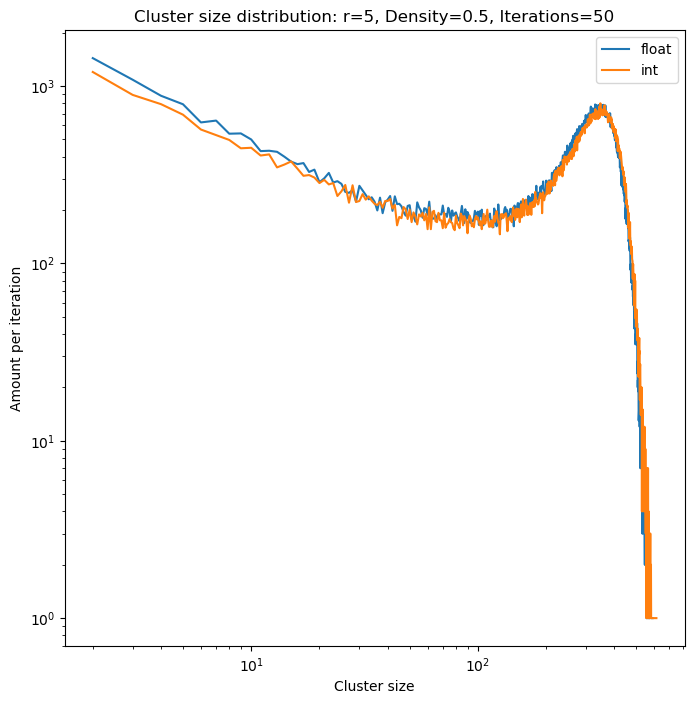

<font size="7"> 3D Growth Keuze </font>

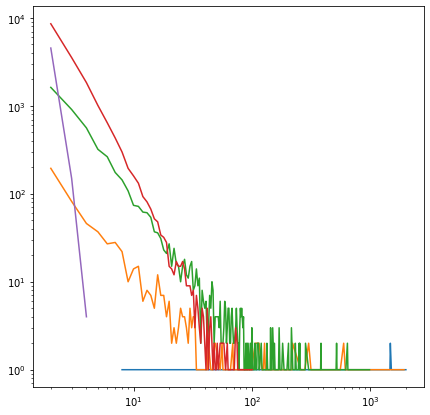

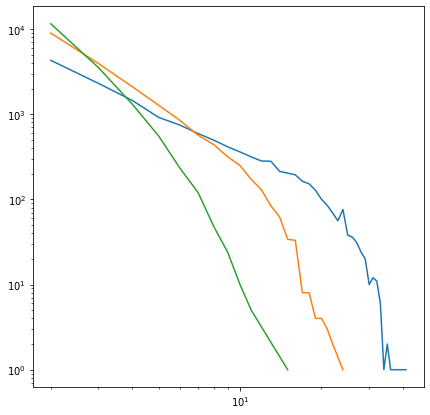

In [12]:
plt.figure(figsize=(7, 7))
size, amount = np.loadtxt("Pref_growth/3D_c0.0_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.01_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.10_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.5_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c1.0_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")


plt.figure(figsize=(7, 7))

size, amount = np.loadtxt("Pref_growth/3D_c0.25_r5.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.50_r5.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.75_r5.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")



<font size="7"> 3D Attach Gravity </font>

/tmp/ipykernel_7442/339476519.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="{} steps".format(name[i]), c=cmap(i), marker='.')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


4
6
9
10
11
9


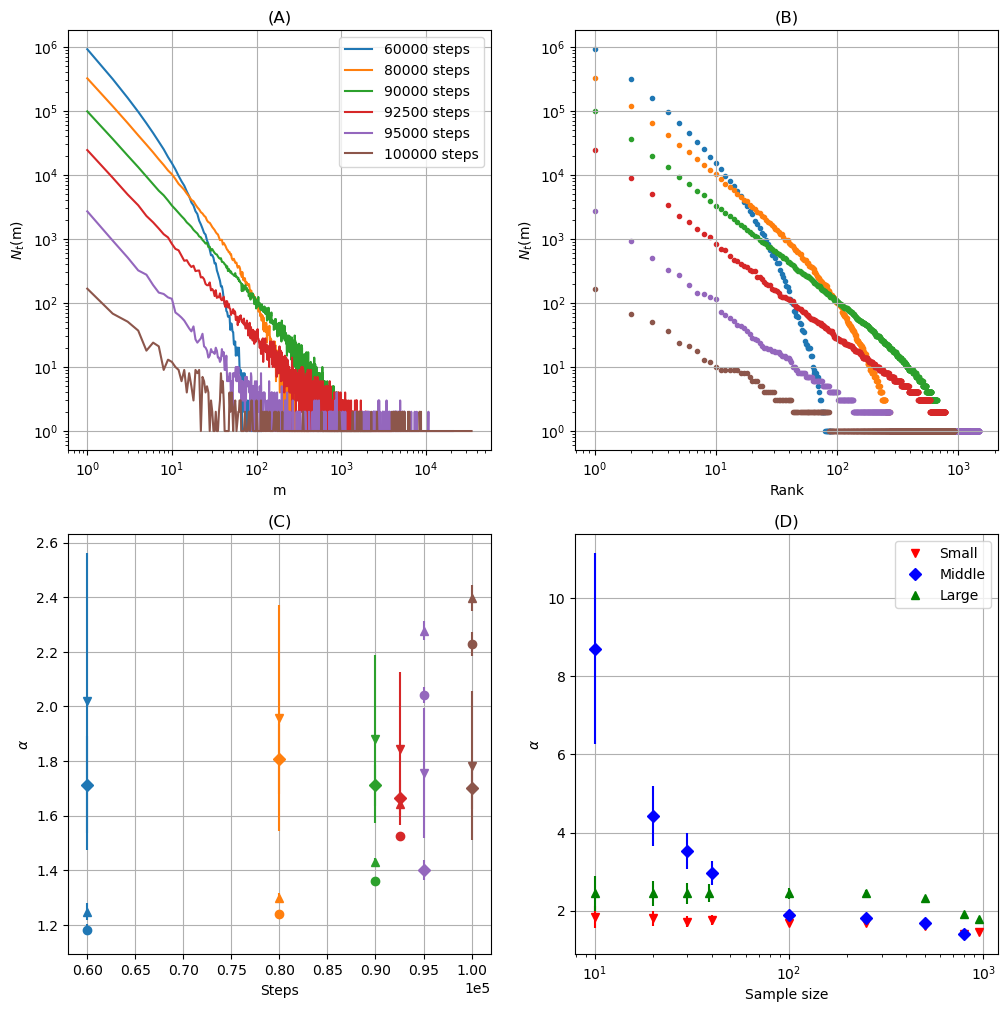

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
name = [60000, 80000, 90000, 92500, 95000, 100000]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

    
def calc_alpha(freq, size, xmin, xmax):
    alpha = 1 + len(freq[xmin:xmax]) / (np.sum(np.log(freq[xmin:xmax]/ (np.min(freq[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(freq[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
    
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="{} steps".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="{} steps".format(name[i]), c=cmap(i), marker='.')

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,0].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,0].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,0].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,0].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_92500_0.100000_0.txt".format(name[i]), skiprows=2, unpack=True)
amount = np.sort(amount)[::-1]
xmin_begin = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
xmax_begin = [10, 20, 30, 40, 100, 250, 500, 800, 950]


xmax_middle = np.array([55, 60, 65, 70, 110, 260, 510, 810])
xmin_middle = np.array([45, 40, 35, 30, 10, 10, 10, 10])

xmax_end = [-1, -1, -1, -1, -1, -1, -1, -1, -1]
xmin_end = [-11, -21, -31, -40, -101, -251, -501, -801, -951]

for i, j in zip(xmin_begin, xmax_begin):
    out = calc_alpha(amount, size, i, j)
    ax[1, 1].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='v', c='r')

for i, j in zip(xmin_middle, xmax_middle):
    out = calc_alpha(amount, size, i, j)
    ax[1, 1].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='D', c='b')


for i, j in zip(xmin_end, xmax_end):
    out = calc_alpha(amount, size, i, j)
    ax[1, 1].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='^', c='g') 

ax[1, 1].set_xscale('log')
ax[1,1].legend()
line1 = Line2D([0], [0], marker='v', color='r', linestyle='None')
line2 = Line2D([0], [0], marker='D', color='b', linestyle='None')
line3 = Line2D([0], [0], marker='^', color='g', linestyle='None')

# Create the legend
ax[1,1].legend([line1, line2, line3], ['Small', 'Middle', 'Large'])

ax[0,0].set_xlabel("m")
ax[0,0].set_ylabel(r"$N_t$(m)")
ax[0,0].set_title("(A)")
ax[0,0].legend()

ax[1,0].set_xlabel("Steps")
ax[1,0].set_ylabel(r"$\alpha$")
ax[1,0].set_title("(C)")

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel(r"$N_t$(m)")
ax[0,1].set_title("(B)")

ax[1,1].set_xlabel("Sample size")
ax[1,1].set_ylabel(r"$\alpha$")
ax[1,1].set_title("(D)")

fig.savefig("finalplot/grav_brak.pdf", bbox_inches='tight', pad_inches=0.2)



<font size="8"> GRAV PLOT1 </font>

Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Assuming nested distributions


1.2088280805269176 0.06028347425328436
------------------------------------
1.165195810052644 0.026119750984144763
------------------------------------
1.4873235047870712 0.10896884837373354
------------------------------------
1.6750807737278872 0.12757827444036113
------------------------------------
1.669287541253281 0.04974775115697227
282.8412226839864 2.4953892495879677e-05
-0.5042021086649919 0.3152854428745928
-0.17949449849675858 0.7107469821844686
0.6236185570789834 0.7132590300546151
------------------------------------
1.7625523922680744 0.031554642510444056
1226.477199050061 6.93672961110297e-08


Calculating best minimal value for power law fit
Assuming nested distributions


-0.08911847339393697 0.672892779013158
-11.13963600581416 0.3126664250446499
7.541054674603721 0.014264276161824746
------------------------------------
1.7727194616748516 0.06650510236349023
------------------------------------
1.9517971624218284 0.14686549064610144
------------------------------------


/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:1560: RuntimeWarning: invalid value encountered in divide
  return likelihoods/norm
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


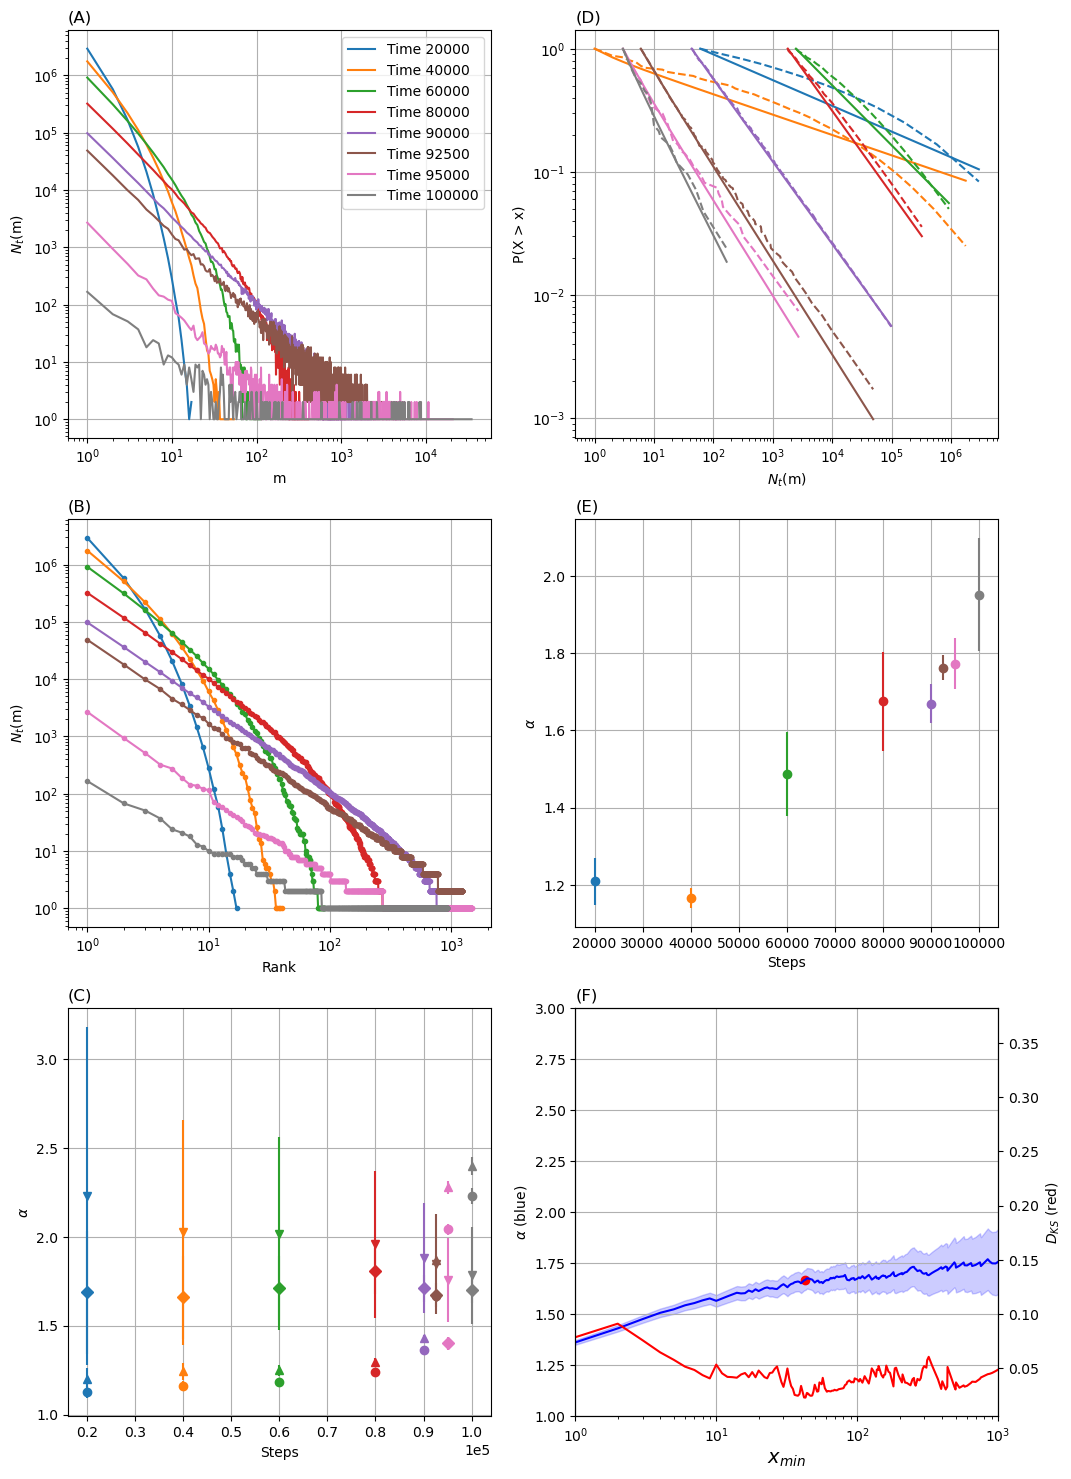

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18))
name = [20000, 40000, 60000, 80000, 90000, 92500, 95000, 100000]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

    
def calc_alpha(freq, size, xmin, xmax):
    alpha = 1 + len(freq[xmin:xmax]) / (np.sum(np.log(freq[xmin:xmax]/ (np.min(freq[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(freq[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
    
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')



cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    if (name[i] == 92500):
        amount = amount * 2
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[1, 0].loglog(ranks, ccdf, label="{} steps".format(name[i]), c=cmap(i), marker='.')

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[2,0].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[2,0].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[2,0].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[2,0].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[2,0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[0, 1], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[0, 1],  label="{} steps".format(name[i]), c=cmap(i))
    
    
    ax[1,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    print(result.power_law.alpha, result.power_law.sigma)

    if (i==4):
        ax[2,1].plot(result.xmins, result.alphas, color='b')
        ax2 = ax[2,1].twinx()
        ax2.plot(result.xmins, result.Ds, color='r')
        ax2.set_ylabel(r'$D_{KS}$ (red)')


        ax[2,1].fill_between(result.xmins, result.alphas-result.sigmas, result.alphas+result.sigmas, color='b', alpha=0.2)
        ax[2,1].set_xscale('log')
        ax[2,1].set_xlim([1, 1000])
        ax[2,1].set_ylim([1, 3])
        ax[2,1].grid()
        ax[2,1].scatter(result.xmin, result.alpha, color='r')

    
    if i == 4 or i == 5:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)

    print('------------------------------------')

ax[0,0].set_xlabel("m")
ax[0,0].set_ylabel(r"$N_t$(m)")
ax[0,0].set_title("(A)", loc="left")
ax[0,0].legend()

ax[1,0].set_xlabel("Rank")
ax[1,0].set_ylabel(r"$N_t$(m)")
ax[1,0].set_title("(B)", loc="left")

ax[2,0].set_xlabel("Steps")
ax[2,0].set_ylabel(r"$\alpha$")
ax[2,0].set_title("(C)", loc="left")
ax[2,0].grid()

ax[0,1].set_xlabel(r"$N_t$(m)")
ax[0,1].set_ylabel("P(X > x)")
ax[0,1].set_title("(D)", loc="left")

ax[1,1].set_xlabel("Steps")
ax[1,1].set_ylabel(r"$\alpha$")
ax[1,1].set_title("(E)", loc="left")


ax[2,1].set_xlabel(r'$x_{min}$', fontsize=14)
ax[2,1].set_ylabel(r"$\alpha$ (blue)")
ax[2,1].set_title("(F)", loc="left")

fig.savefig('finalplot/grav_plot1.pdf', bbox_inches='tight', pad_inches=0.2)





Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
/tmp/ipykernel_4702/247023936.py:44: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for p

5
7
7
7
7
7
7


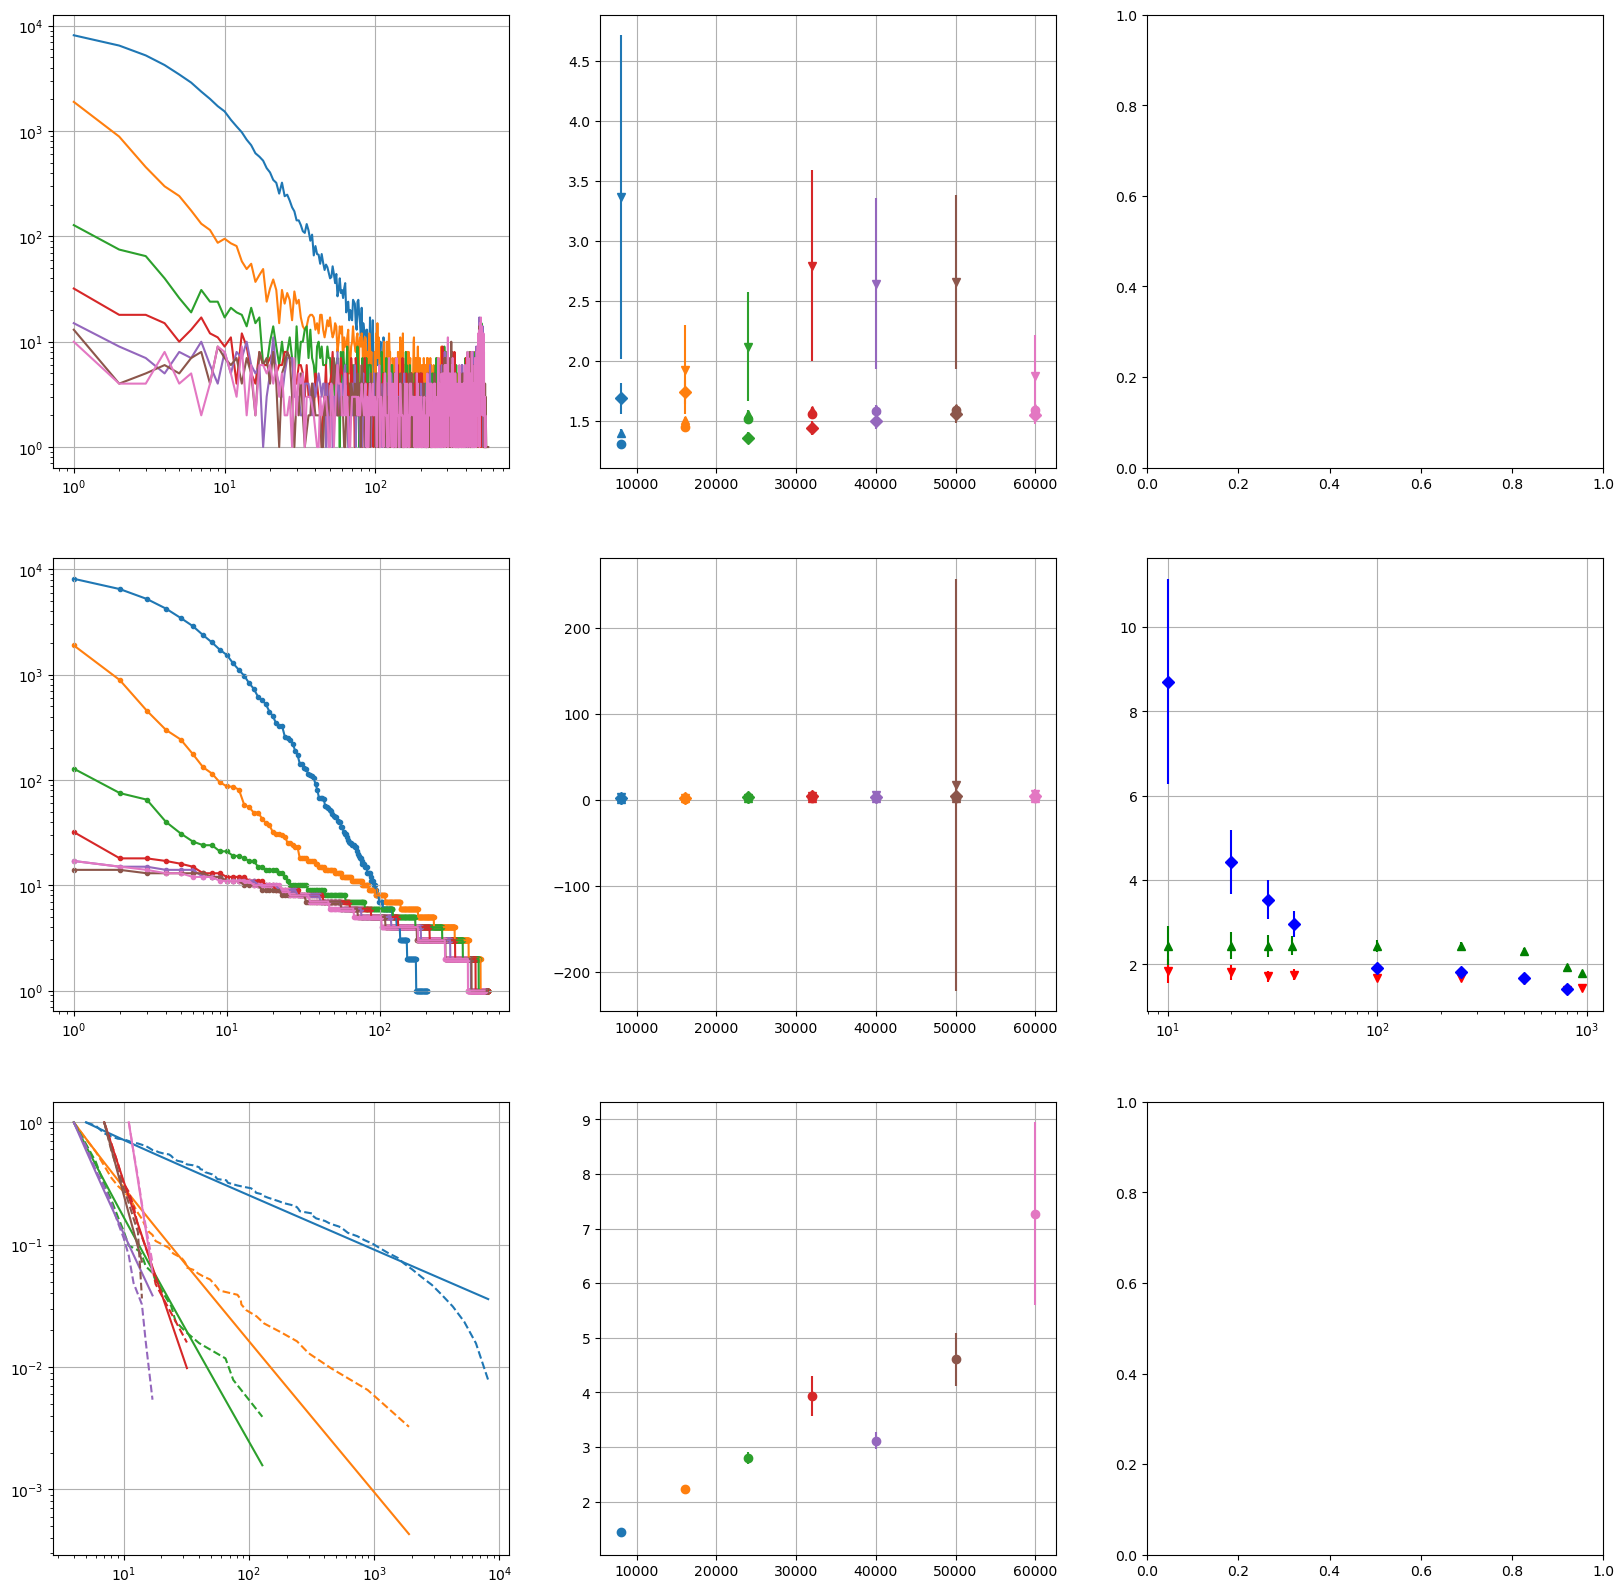

In [53]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
name = [8000, 16000, 24000, 32000, 40000, 50000, 60000]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

    
def calc_alpha(freq, size, xmin, xmax):
    alpha = 1 + len(freq[xmin:xmax]) / (np.sum(np.log(freq[xmin:xmax]/ (np.min(freq[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(freq[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
    
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[2,0].grid()
ax[2,1].grid()

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/True/r50_2D/r50_2D_100_{}_0.100000_1.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)

    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[2, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[2, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[2,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))

    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[1, 0].plot(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[0,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[0,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[0,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[0,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))

    out1 = calc_alpha(ccdf, size, lower_lim, upper_lim)
    out12 = calc_alpha(ccdf, size, upper_lim, lower_lim2)
    out13 = calc_alpha(ccdf, size, lower_lim2, upper_lim2)
    out14 = calc_alpha(ccdf, size, 0, -1)


    ax[1,1].errorbar(name[i], out1[0], yerr=out1[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out12[0], yerr=out12[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out13[0], yerr=out13[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out14[0], yerr=out14[1], fmt='o', c=cmap(i))

size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_92500_0.100000_0.txt".format(name[i]), skiprows=2, unpack=True)
amount = np.sort(amount)[::-1]
xmin_begin = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
xmax_begin = [10, 20, 30, 40, 100, 250, 500, 800, 950]


xmax_middle = np.array([55, 60, 65, 70, 110, 260, 510, 810])
xmin_middle = np.array([45, 40, 35, 30, 10, 10, 10, 10])

xmax_end = [-1, -1, -1, -1, -1, -1, -1, -1, -1]
xmin_end = [-11, -21, -31, -40, -101, -251, -501, -801, -951]

for i, j in zip(xmin_begin, xmax_begin):
    out = calc_alpha(amount, size, i, j)
    ax[1, 2].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='v', c='r')

for i, j in zip(xmin_middle, xmax_middle):
    out = calc_alpha(amount, size, i, j)
    ax[1, 2].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='D', c='b')


for i, j in zip(xmin_end, xmax_end):
    out = calc_alpha(amount, size, i, j)
    ax[1, 2].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='^', c='g')

ax[1, 2].set_xscale('log')
ax[1, 2].grid()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


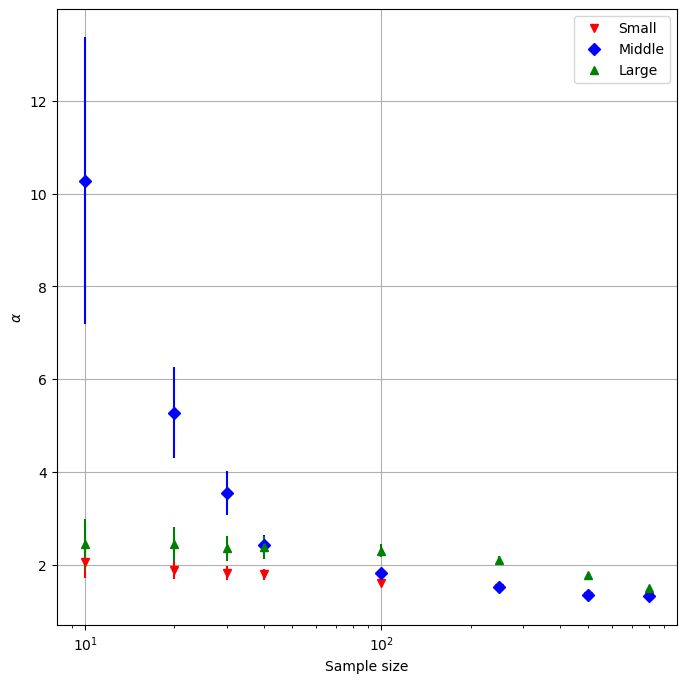

In [22]:
plt.figure(figsize=(8, 8))


def calc_alpha2(amount, size, xmin, xmax):
    maxc = size[xmax]
    minc = size[xmin]
    amount = np.array(amount)[maxc > size]
    size = size[maxc > size]
    amount = np.array(amount)[minc < size]
    alpha = 1 + len(amount) / (np.sum(np.log(amount/ (np.min(amount) - 0.5))))
    xmin2 = np.min(amount)
    invSigma = np.sqrt(len(amount) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]



line1 = Line2D([0], [0], marker='v', color='r', linestyle='None')
line2 = Line2D([0], [0], marker='D', color='b', linestyle='None')
line3 = Line2D([0], [0], marker='^', color='g', linestyle='None')

# Create the legend
plt.legend([line1, line2, line3], ['Small', 'Middle', 'Large'])


size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_90000_0.100000_0.txt", skiprows=2, unpack=True)
#amount = np.sort(amount)[::-1]
xmin_begin = [0, 0, 0, 0, 0, 0, 0, 0, 0]
xmax_begin = [10, 20, 30, 40, 100, 250, 500, 800]


xmax_middle = np.array([55, 60, 65, 70, 110, 260, 510, 810])
xmin_middle = np.array([45, 40, 35, 30, 10, 10, 10, 10])

xmax_end = [-1, -1, -1, -1, -1, -1, -1, -1] * 6
xmin_end = [-11, -21, -31, -41, -101, -251, -501, -801]

for i, j in zip(xmin_begin, xmax_begin):
    out = calc_alpha2(amount, size, i, j)
    plt.errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='v', c='r')

for i, j in zip(xmin_middle, xmax_middle):
    out = calc_alpha2(amount, size, i, j)
    plt.errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='D', c='b')


for i, j in zip(xmin_end, xmax_end):
    out = calc_alpha2(amount, size, i, j)
    plt.errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='^', c='g') 

plt.xscale('log')
plt.legend()
line1 = Line2D([0], [0], marker='v', color='r', linestyle='None')
line2 = Line2D([0], [0], marker='D', color='b', linestyle='None')
line3 = Line2D([0], [0], marker='^', color='g', linestyle='None')

# Create the legend
plt.legend([line1, line2, line3], ['Small', 'Middle', 'Large'])

plt.xlabel("Sample size")
plt.ylabel(r"$\alpha$")
plt.grid()

plt.savefig("finalplot/sample_size.jpeg", bbox_inches='tight', pad_inches=0.2)

Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Assuming nested distributions


1.2979035428678947 0.0683437599096784
------------------------------------
1.6925491608917473 0.1332811481559666
------------------------------------
1.6643390556107387 0.055361587967561555
152.1517458641667 7.952481404100327e-06
-1.2534191406580635 0.11335314672392771
-0.6437028360973618 0.45747734178841315
-0.6291132943498052 0.6101895436172324
------------------------------------
1.6824363066126833 0.0385735806798354
423.42139956292647 5.991032996263391e-08


Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Assuming nested distributions


-1.1328548345352933 0.13226561076256527
-0.5218605114019041 0.5045665584236746
-0.06270868670207541 0.9704313916934634
------------------------------------
9.10175552385089 5.728806270430534
------------------------------------
2.8579256649361255 0.587527682448099
------------------------------------
5.079914621303401 2.88493529538578
------------------------------------


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


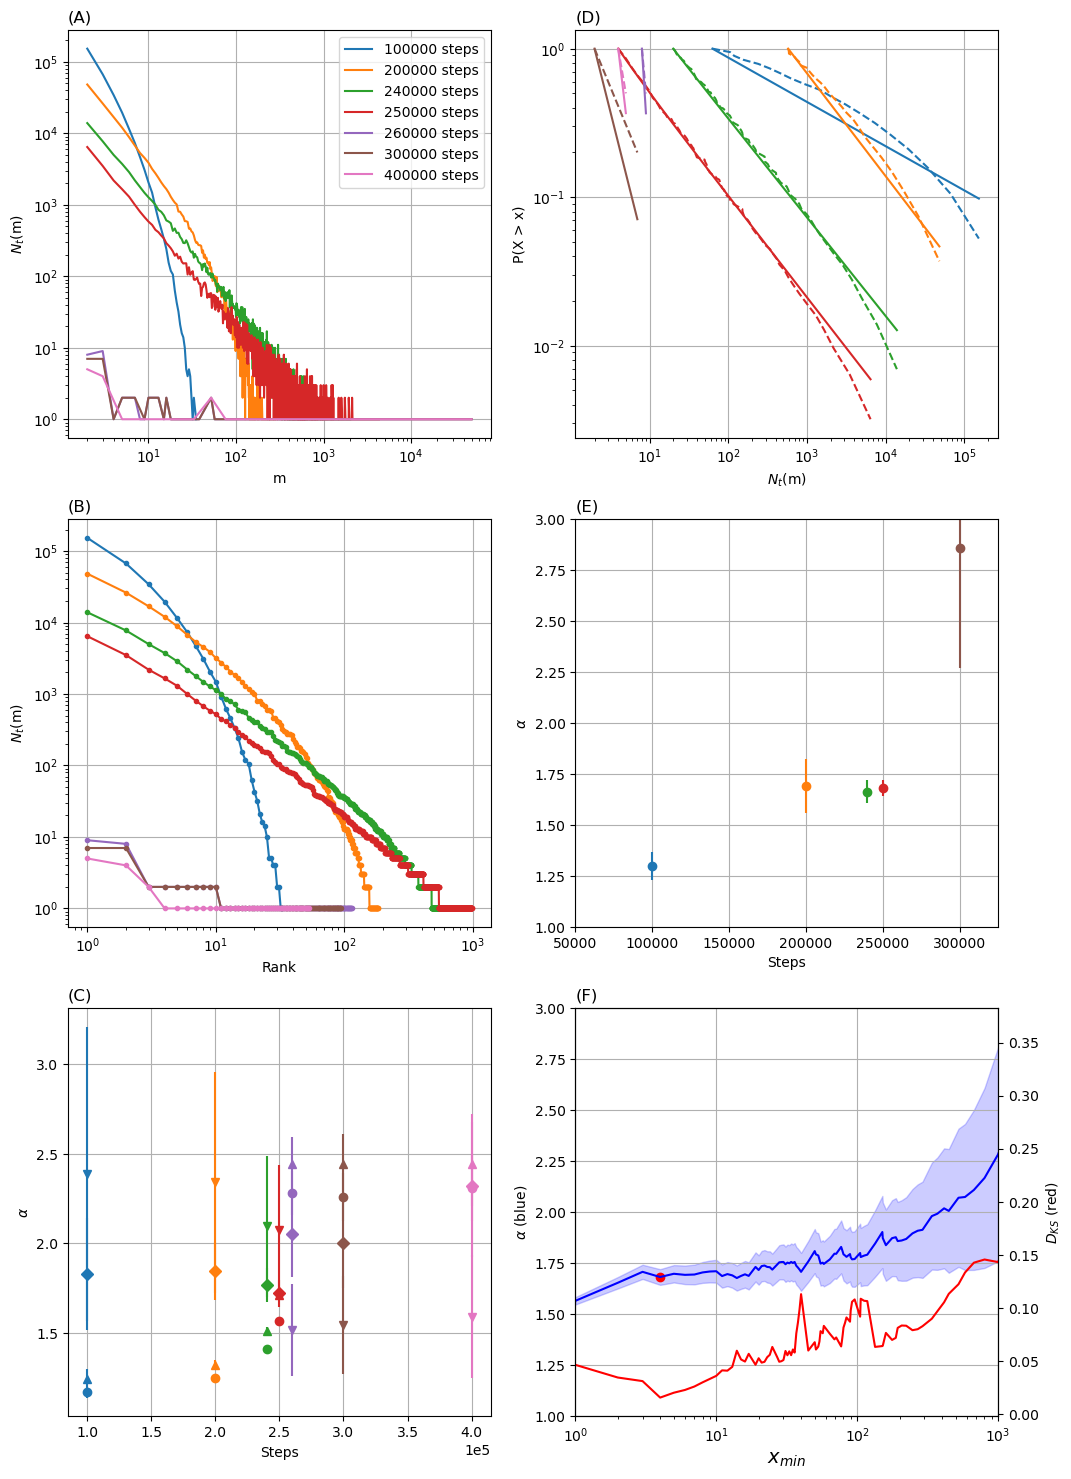

In [3]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18))
name = [100000, 200000, 240000, 250000, 260000, 300000, 400000]
  
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    if (name[i] == 250000):
        size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_100_250000_0.300000_0.txt", skiprows=2, unpack=True)
    else:
        size, amount = np.loadtxt("Pref_attach/False/3D_r20/new/r20_3D_c0.00000_100_{}_0.300000_0.txt".format(name[i]), skiprows=2, unpack=True)
 
    size = size[1:]
    amount = amount[1:]
    if (name[i] == 92500):
        amount = amount * 2
    ax[0, 0].loglog(size, amount, label="{} steps".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[1, 0].loglog(ranks, ccdf, label="{} steps".format(name[i]), c=cmap(i), marker='.')

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(size))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(size))/3)))
    upper_lim2 = -1

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[2,0].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[2,0].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[2,0].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[2,0].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[2,0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[0, 1], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[0, 1],  label="{} steps".format(name[i]), c=cmap(i))
    
    
    ax[1,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    print(result.power_law.alpha, result.power_law.sigma)

    if (i==3):
        ax[2,1].plot(result.xmins, result.alphas, color='b')
        ax2 = ax[2,1].twinx()
        ax2.plot(result.xmins, result.Ds, color='r')
        ax2.set_ylabel(r'$D_{KS}$ (red)')
        ax[2,1].set_xscale('log')
        ax[2,1].set_xlim([1, 1000])
        ax[2,1].set_ylim([1, 3])
        ax[2,1].fill_between(result.xmins, result.alphas-result.sigmas, result.alphas+result.sigmas, color='b', alpha=0.2)
        ax[2,1].grid()
        ax[2,1].scatter(result.xmin, result.alpha, color='r')

    
    if i == 2 or i == 3:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)

    print('------------------------------------')

ax[0,0].set_xlabel("m")
ax[0,0].set_ylabel(r"$N_t$(m)")
ax[0,0].set_title("(A)", loc="left")
ax[0,0].legend()

ax[1,0].set_xlabel("Rank")
ax[1,0].set_ylabel(r"$N_t$(m)")
ax[1,0].set_title("(B)", loc="left")

ax[2,0].set_xlabel("Steps")
ax[2,0].set_ylabel(r"$\alpha$")
ax[2,0].set_title("(C)", loc="left")
ax[2,0].grid()

ax[0,1].set_xlabel(r"$N_t$(m)")
ax[0,1].set_ylabel("P(X > x)")
ax[0,1].set_title("(D)", loc="left")

ax[1,1].set_xlabel("Steps")
ax[1,1].set_ylabel(r"$\alpha$")
ax[1,1].set_title("(E)", loc="left")
ax[1,1].set_xlim([50000, 325000])
ax[1,1].set_ylim([1, 3])

ax[2,1].set_xlabel(r'$x_{min}$', fontsize=14)
ax[2,1].set_ylabel(r"$\alpha$ (blue)")
ax[2,1].set_title("(F)", loc="left")

fig.savefig('finalplot/grav_plot2.pdf', bbox_inches='tight', pad_inches=0.2)






Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/tmp/ipykernel_16673/1595556597.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


(1.2, 1.8)

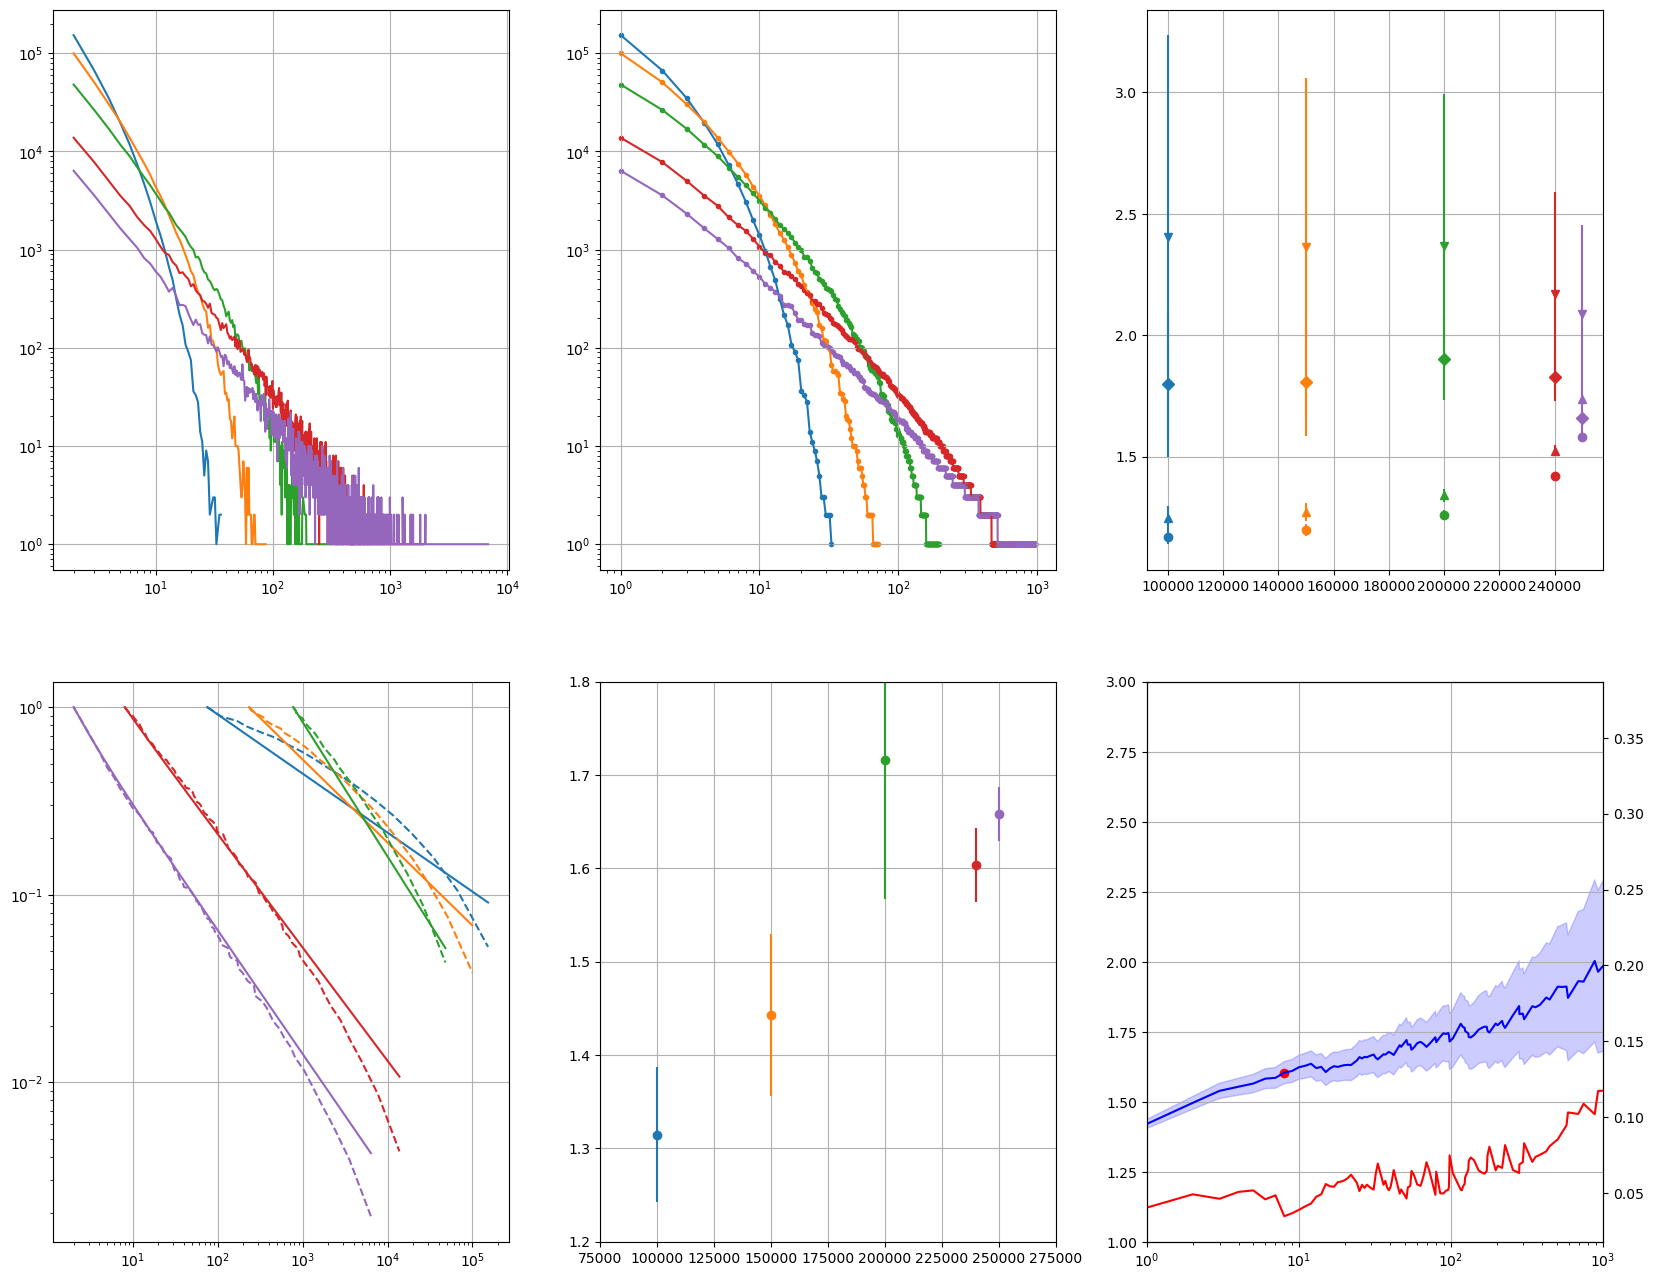

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(20, 16))
name = [100000, 150000, 200000,240000, 250000]
  
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[0,2].grid()
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r40/r40_3D_c0.00000_100_{}_0.300000_0.txt".format(name[i]), skiprows=2, unpack=True)

    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[1,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))

    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[0,2].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[0,2].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[0,2].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[0,2].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))


    if (i==3):
        ax[1,2].plot(result.xmins, result.alphas, color='b')
        ax2 = ax[1,2].twinx()
        ax2.plot(result.xmins, result.Ds, color='r')
        ax[1,2].fill_between(result.xmins, result.alphas-result.sigmas, result.alphas+result.sigmas, color='b', alpha=0.2)
        ax[1,2].set_xscale('log')
        ax[1,2].scatter(result.xmin, result.alpha, color='r')
        ax[1,2].set_xlim([1, 1000])
        ax[1,2].set_ylim([1, 3])
        ax[1,2].grid()

ax[1,1].set_xlim([75000, 275000])
ax[1,1].set_ylim([1.2, 1.8])


[1.565193502253986, mpf('0.018180567092428393')]
[1.565193502253986, mpf('0.018180567092428393')]


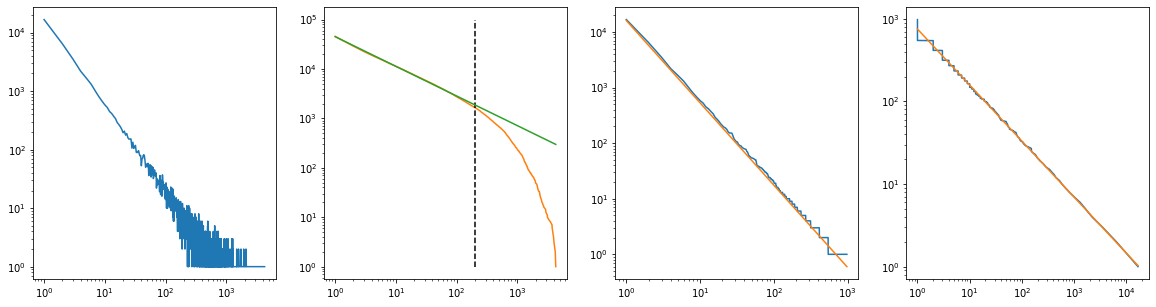

In [134]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_100_250000_0.300000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax[0].loglog(size, amount, label="int")
print(calc_alpha(amount, size, 1, -1))

ccdf = np.sort(amount)[::-1]
ranks = np.arange(1, len(ccdf)+1)
print(calc_alpha(ccdf, ranks, 1, -1))

ax[2].plot(ranks, ccdf)
ax[3].plot(ccdf, ranks)

def power_law(x, a, b):
    return a * np.power(x, -b)
ax[2].plot(ranks, power_law(ranks, 1.6*  10**4, 1.48))
ax[3].plot(ccdf, power_law(ccdf, 0.75* 10**3, 0.678))

ax[1].set_xscale('log')
ax[1].set_yscale('log')

ccdf2 = 1 - np.cumsum(amount)
ax[1].plot(ccdf2, ranks)    
ax[3].set_xscale('log')
ax[3].set_yscale('log')
lijst2 = []

amount = amount[:10**3]
for i in range(len(size)):
    lijst2.append(np.sum(amount[i:]))

    
rank = np.arange(1, len(amount)+1)
ax[1].plot(size, lijst2)
ax[1].vlines(200, 1, 100000, colors='k', linestyles='dashed')
ax[1].plot(size, power_law(size, 4.5* 10**4, 0.6))

ax[2].set_xscale('log')
ax[2].set_yscale('log')






Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Assuming nested distributions


1.3628746145152326 0.09698232013383333
------------------------------------
1.5584834873641262 0.14926099042051816
------------------------------------
1.5963896195208167 0.10227997594149923
------------------------------------
1.6363601837848138 0.0842879654170844
------------------------------------
1.672202672327277 0.037934591405576853
564.1308029847139 1.8664575521709764e-06
-0.4898007379573581 0.32229721514381415
-0.17542552055106153 0.7183771052703858
1.1590814858474783 0.5734511036626183
------------------------------------
1.2890256906911963 0.06462810916293431
------------------------------------
1.4098911926139737 0.07888359679804481
------------------------------------
1.6444350863284631 0.13154476115426353
------------------------------------
1.5932066640583975 0.03869653600876751
------------------------------------
1.6514353981990295 0.028567332002546336
1092.941388940593 6.995646765603318e-08


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Assuming nested distributions


-0.6270355362688047 0.26277634659680493
-0.19974096170602618 0.7484262169435443
2.2787445029482596 0.38211651238026123
------------------------------------
1.1821052288155944 0.02954136901380842
------------------------------------
1.3318210415857863 0.05182174033824784
------------------------------------
1.646915058300927 0.12687048099667084
------------------------------------
1.6401045743593499 0.052264319640060654
------------------------------------
1.6424524970690915 0.02833736485742564
1065.7137424793468 9.638599784126788e-08


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Assuming nested distributions


-0.7197395055176652 0.23022366637987357
-0.3784198525425997 0.6456221454104955
1.5824178408336635 0.5487522764405814
------------------------------------


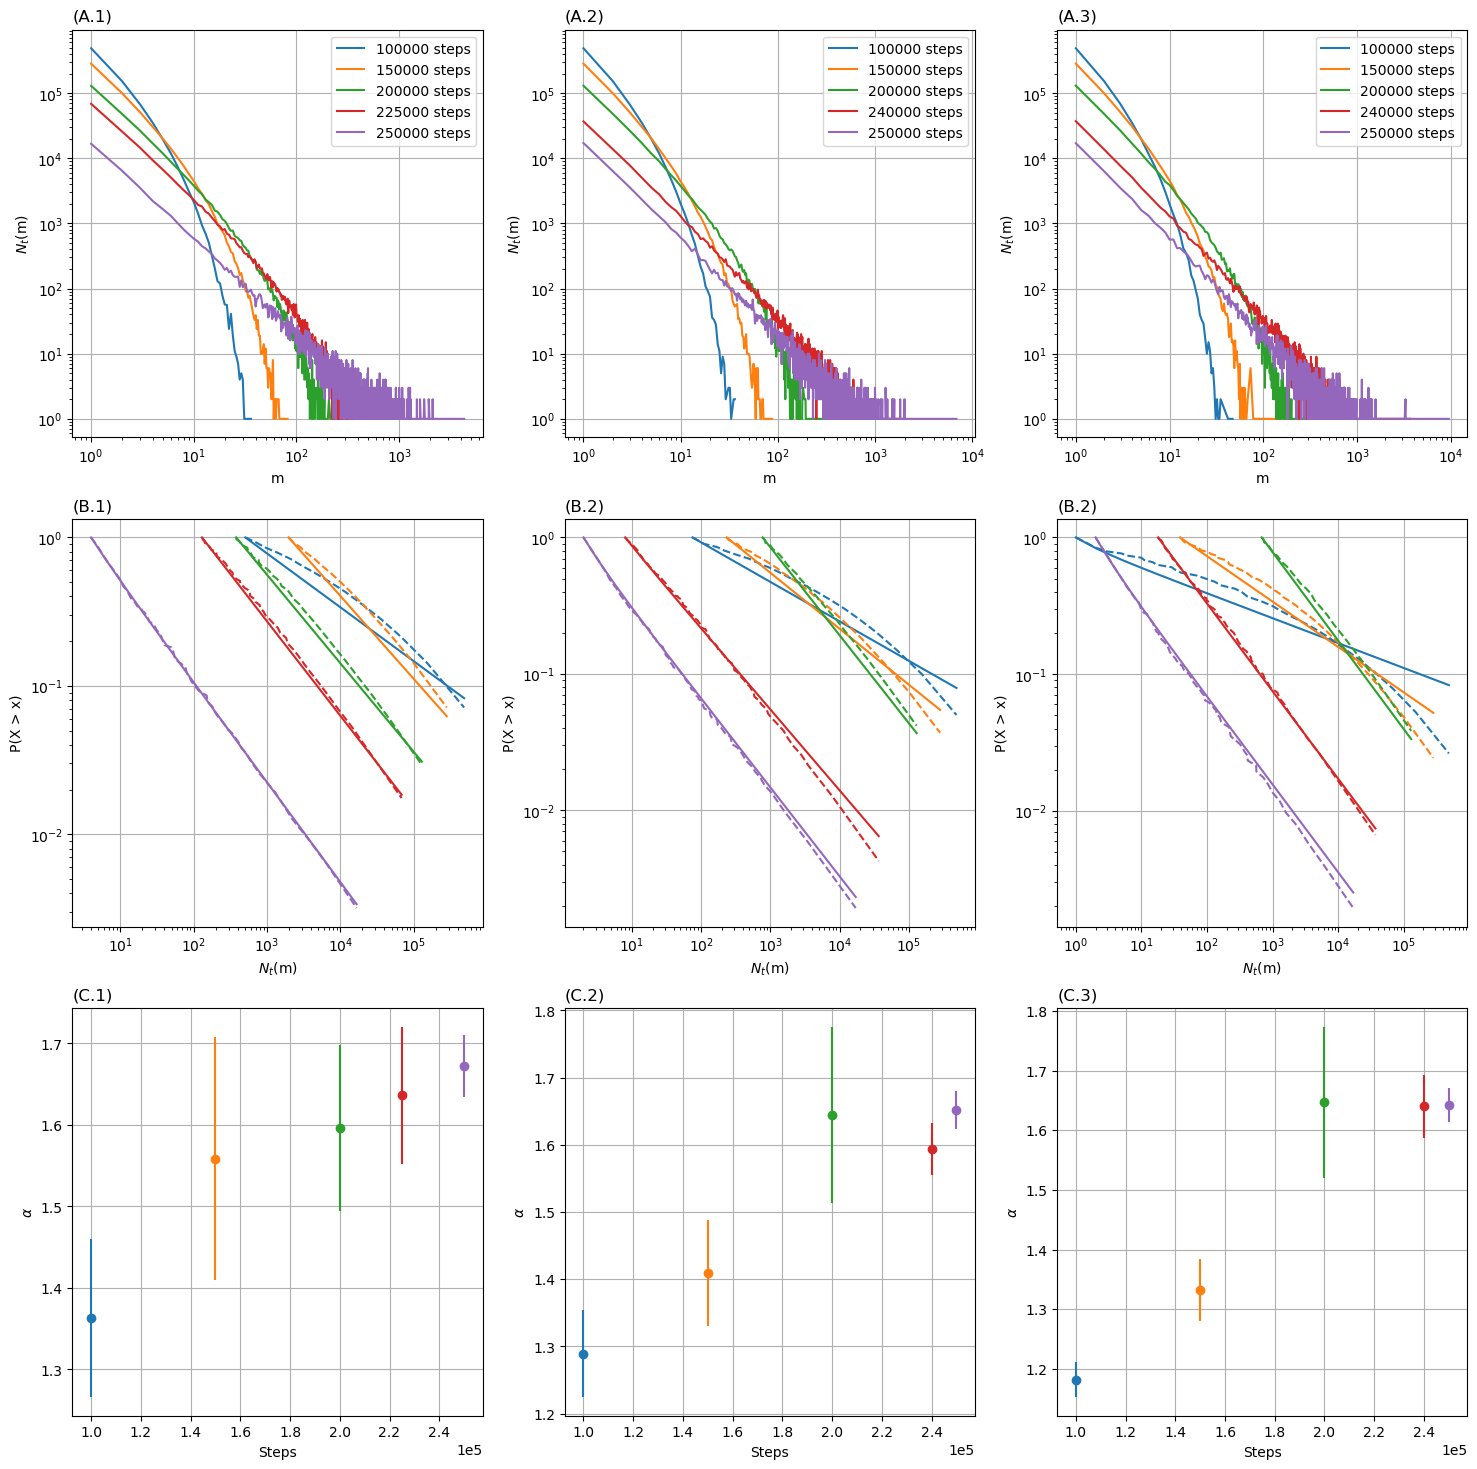

In [4]:


fig, ax = plt.subplots(3, 3, figsize=(18, 18))
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')
ax[1, 1].set_xscale('log')
ax[1, 1].set_yscale('log')
ax[1, 2].set_xscale('log')
ax[1, 2].set_yscale('log')


ax[1, 0].grid()
ax[1, 1].grid()
ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 2].grid()
ax[2, 0].grid()
ax[2, 1].grid()
ax[2, 2].grid()

cmap = plt.get_cmap('tab10')    


name = [100000, 150000, 200000, 225000, 250000]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_100_{}_0.300000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="{} steps".format(name[i]), c=cmap(i))
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="{} steps".format(name[i]), c=cmap(i))
    ax[2,0].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    ax[2,0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    print(result.power_law.alpha, result.power_law.sigma)
    if i == 4:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)
    print('------------------------------------')


name = [100000, 150000, 200000,240000, 250000]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r40/r40_3D_c0.00000_100_{}_0.300000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 1].loglog(size, amount, label="{} steps".format(name[i]), c=cmap(i))
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 1], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 1],  label="{} steps".format(name[i]), c=cmap(i))
    ax[2,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    ax[2,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

    print(result.power_law.alpha, result.power_law.sigma)
    if i == 4:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)
    print('------------------------------------')



name = [100000, 150000, 200000,240000, 250000]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r60/r60_3D_c0.00000_100_{}_0.300000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 2].loglog(size, amount, label="{} steps".format(name[i]), c=cmap(i))
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 2], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 2],  label="{} steps".format(name[i]), c=cmap(i))
    ax[2,2].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    ax[2,2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

    print(result.power_law.alpha, result.power_law.sigma)
    if i == 4:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)
    print('------------------------------------')

ax[0,0].set_ylabel(r"$N_t$(m)")
ax[0,0].set_xlabel("m")
ax[0,0].set_title('(A.1)', loc='left')
ax[0,0].legend()    

ax[0,1].set_xlabel("m")
ax[0,1].set_ylabel(r"$N_t$(m)")
ax[0,1].set_title('(A.2)', loc='left')
ax[0,1].legend()

ax[0,2].set_xlabel("m")
ax[0,2].set_ylabel(r"$N_t$(m)")
ax[0,2].set_title('(A.3)', loc='left')
ax[0,2].legend()

ax[1,0].set_xlabel(r"$N_t$(m)")
ax[1,0].set_ylabel("P(X > x)")
ax[1,0].set_title('(B.1)', loc='left')


ax[1,1].set_xlabel(r"$N_t$(m)")
ax[1,1].set_ylabel("P(X > x)")
ax[1,1].set_title('(B.2)', loc='left')

ax[1,2].set_xlabel(r"$N_t$(m)")
ax[1,2].set_ylabel("P(X > x)")
ax[1,2].set_title('(B.2)', loc='left')

ax[2,0].set_xlabel("Steps")
ax[2,0].set_ylabel(r"$\alpha$")
ax[2,0].set_title('(C.1)', loc='left')

ax[2,1].set_xlabel("Steps")
ax[2,1].set_ylabel(r"$\alpha$")
ax[2,1].set_title('(C.2)', loc='left')


ax[2,2].set_xlabel("Steps")
ax[2,2].set_ylabel(r"$\alpha$")
ax[2,2].set_title('(C.3)', loc='left')

fig.savefig('finalplot/grav_rad.pdf', bbox_inches='tight', pad_inches=0.2)





Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Assuming nested distributions


1.165195810052644 0.026119750984144763
------------------------------------
1.4873235047870712 0.10896884837373354
------------------------------------
1.6750807737278872 0.12757827444036113
------------------------------------
1.724502311843498 0.03356192150072716
------------------------------------
1.228477732720842 0.05108917417088308
------------------------------------
1.5584834873641262 0.14926099042051816
------------------------------------
1.6363601837848138 0.0842879654170844
59.33036028823115 0.0017548242672477874
-0.6512177207623537 0.2537688409836143
-0.34610103810955994 0.5878617768535624
-0.3670270002065372 0.6573512149738927
------------------------------------
1.672202672327277 0.037934591405576853
------------------------------------
1.2083650297283879 0.04911210849435989
------------------------------------
1.4315462248087272 0.11968938779082891
------------------------------------
1.5341209303539671 0.11655474255272813
------------------------------------
1.6106752

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


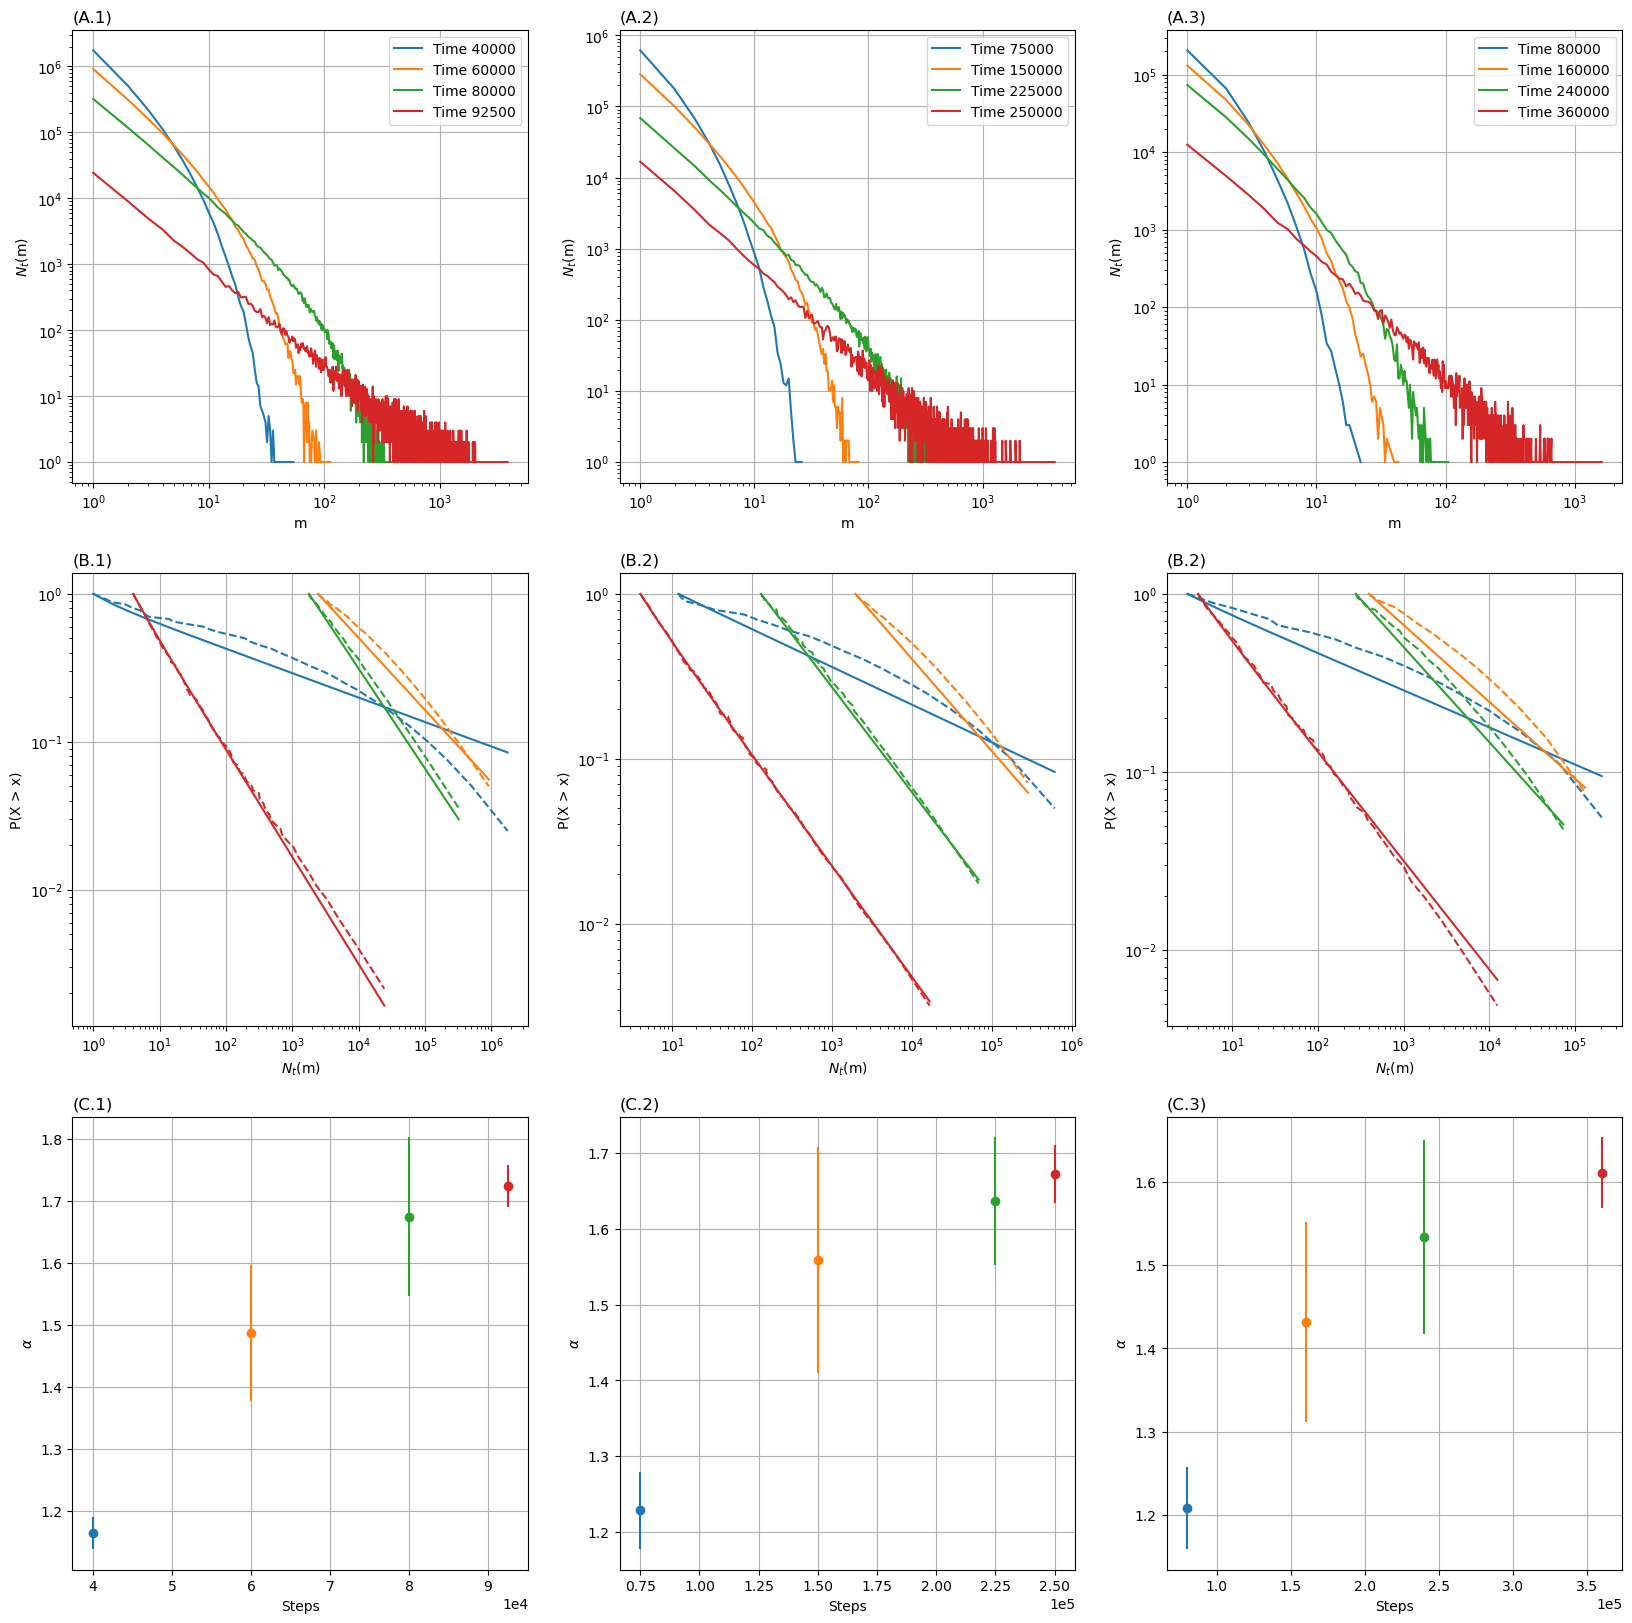

In [5]:


fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')
ax[1, 1].set_xscale('log')
ax[1, 1].set_yscale('log')
ax[1, 2].set_xscale('log')
ax[1, 2].set_yscale('log')


ax[1, 0].grid()
ax[1, 1].grid()
ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 2].grid()
ax[2, 0].grid()
ax[2, 1].grid()
ax[2, 2].grid()

cmap = plt.get_cmap('tab10')    


name = [40000, 60000, 80000, 92500]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[2,0].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    ax[2,0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    print(result.power_law.alpha, result.power_law.sigma)
    if i == 4:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)
    print('------------------------------------')


name = [75000, 150000, 225000, 250000]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_100_{}_0.300000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 1].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 1], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 1],  label="Time {}".format(name[i]), c=cmap(i))
    ax[2,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    ax[2,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    print(result.power_law.alpha, result.power_law.sigma)
    if i == 2:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)
    print('------------------------------------')



name = [80000, 160000,240000, 360000]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20_0.5/r20_3D_c0.00000_100_{}_0.500000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 2].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 2], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 2],  label="Time {}".format(name[i]), c=cmap(i))
    ax[2,2].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    ax[2,2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    print(result.power_law.alpha, result.power_law.sigma)
    if i == 4:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)
    print('------------------------------------')

ax[0,0].set_ylabel(r"$N_t$(m)")
ax[0,0].set_xlabel("m")
ax[0,0].set_title('(A.1)', loc='left')
ax[0,0].legend()    

ax[0,1].set_xlabel("m")
ax[0,1].set_ylabel(r"$N_t$(m)")
ax[0,1].set_title('(A.2)', loc='left')
ax[0,1].legend()

ax[0,2].set_xlabel("m")
ax[0,2].set_ylabel(r"$N_t$(m)")
ax[0,2].set_title('(A.3)', loc='left')
ax[0,2].legend()

ax[1,0].set_xlabel(r"$N_t$(m)")
ax[1,0].set_ylabel("P(X > x)")
ax[1,0].set_title('(B.1)', loc='left')


ax[1,1].set_xlabel(r"$N_t$(m)")
ax[1,1].set_ylabel("P(X > x)")
ax[1,1].set_title('(B.2)', loc='left')

ax[1,2].set_xlabel(r"$N_t$(m)")
ax[1,2].set_ylabel("P(X > x)")
ax[1,2].set_title('(B.2)', loc='left')

ax[2,0].set_xlabel("Steps")
ax[2,0].set_ylabel(r"$\alpha$")
ax[2,0].set_title('(C.1)', loc='left')

ax[2,1].set_xlabel("Steps")
ax[2,1].set_ylabel(r"$\alpha$")
ax[2,1].set_title('(C.2)', loc='left')


ax[2,2].set_xlabel("Steps")
ax[2,2].set_ylabel(r"$\alpha$")
ax[2,2].set_title('(C.3)', loc='left')

fig.savefig('finalplot/grav_dens.pdf', bbox_inches='tight', pad_inches=0.2)




Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Assuming nested distributions


1.1735646832011342 0.03881024301309518
------------------------------------
1.302497576970231 0.05522824883241691
------------------------------------
1.5827818946565089 0.09580875330142748
------------------------------------
1.6844089868474517 0.04474121511812081
387.9217412645938 1.0049477127126357e-05
-0.4239953469422111 0.35712138282664285
-0.1301778318381448 0.7527319192405797
0.8413352151282565 0.6273652174483666
------------------------------------
2.399318579125464 0.32102569874878006
------------------------------------
1.2780577354015175 0.07711934019458229
------------------------------------
1.519756303942922 0.12605942004337087
------------------------------------
1.6393297761579826 0.0444364912216075
345.8713847538503 8.505714894475343e-06


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Assuming nested distributions


-0.6224024439999503 0.2645470401480513
-0.28972541558632114 0.598585704049875
0.2527612927883842 0.8700006144857645
------------------------------------
2.204044098036608 0.3807521753078751
------------------------------------
1.4873235047870712 0.10896884837373354
------------------------------------
1.518902196851514 0.08771047989140625
------------------------------------
1.6750807737278872 0.12757827444036113
------------------------------------
1.724502311843498 0.03356192150072716
913.8195716035154 3.8357024670358557e-07


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Assuming nested distributions


-0.2180705254218993 0.5089909107252742
-0.02125910868635028 0.8701814454122686
3.543000406479017 0.17220664963901589
------------------------------------


Text(0.5, 1.0, 'Alpha as function of steps')

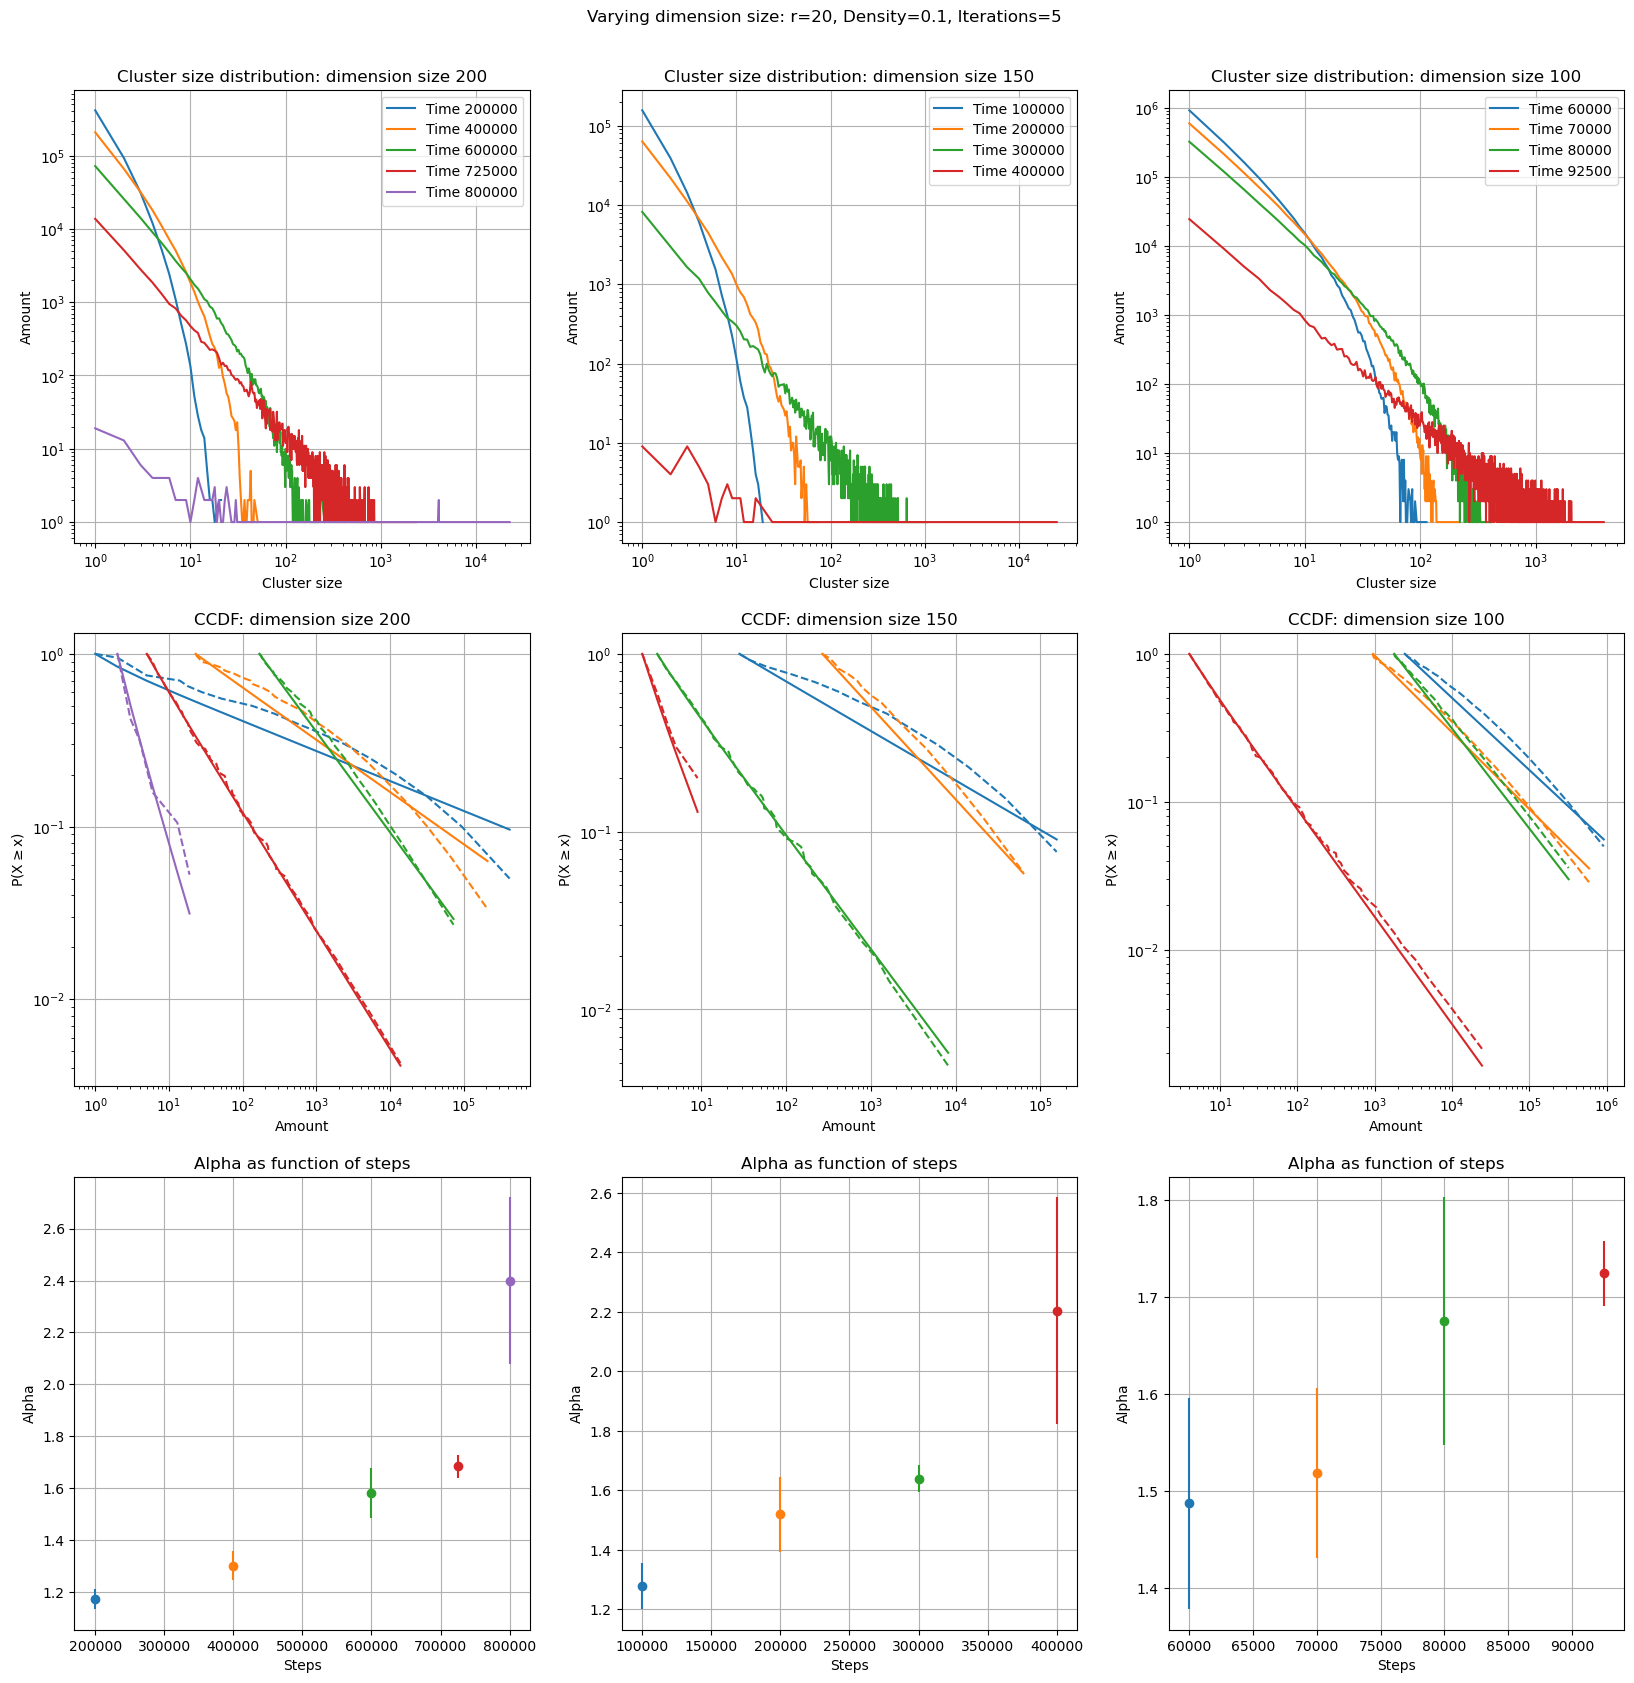

In [4]:

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')
ax[1, 1].set_xscale('log')
ax[1, 1].set_yscale('log')
ax[1, 2].set_xscale('log')
ax[1, 2].set_yscale('log')


ax[1, 0].grid()
ax[1, 1].grid()
ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 2].grid()
ax[2, 0].grid()
ax[2, 1].grid()
ax[2, 2].grid()

cmap = plt.get_cmap('tab10')    


name = [200000, 400000, 600000, 725000, 800000]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20_200/r20_3D_200_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[2,0].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    print(result.power_law.alpha, result.power_law.sigma)
    if i == 3:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)
    print('------------------------------------')


name = [100000, 200000, 300000, 400000]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20_150/r20_3D_150_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 1].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 1], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 1],  label="Time {}".format(name[i]), c=cmap(i))
    ax[2,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    print(result.power_law.alpha, result.power_law.sigma)
    if i == 2:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)
    print('------------------------------------')



name = [60000, 70000, 80000, 92500]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 2].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 2], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 2],  label="Time {}".format(name[i]), c=cmap(i))
    ax[2,2].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    print(result.power_law.alpha, result.power_law.sigma)
    if i == 3:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)
    print('------------------------------------')

fig.suptitle("Varying dimension size: r=20, Density=0.1, Iterations=5", y=0.92)

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: dimension size 200")
ax[0,0].legend()    

ax[0,1].set_xlabel("Cluster size")
ax[0,1].set_ylabel("Amount")
ax[0,1].set_title("Cluster size distribution: dimension size 150")
ax[0,1].legend()

ax[0,2].set_xlabel("Cluster size")
ax[0,2].set_ylabel("Amount")
ax[0,2].set_title("Cluster size distribution: dimension size 100")
ax[0,2].legend()

ax[1,0].set_xlabel("Amount")
ax[1,0].set_ylabel("P(X"+ r'$\geq$'+ "x)")
ax[1,0].set_title("CCDF: dimension size 200")

ax[1,1].set_xlabel("Amount")
ax[1,1].set_ylabel("P(X"+ r'$\geq$'+ "x)")
ax[1,1].set_title("CCDF: dimension size 150")

ax[1,2].set_xlabel("Amount")
ax[1,2].set_ylabel("P(X"+ r'$\geq$'+ "x)")
ax[1,2].set_title("CCDF: dimension size 100")

ax[2,0].set_xlabel("Steps")
ax[2,0].set_ylabel("Alpha")
ax[2,0].set_title("Alpha as function of steps")

ax[2,1].set_xlabel("Steps")
ax[2,1].set_ylabel("Alpha")
ax[2,1].set_title("Alpha as function of steps")

ax[2,2].set_xlabel("Steps")
ax[2,2].set_ylabel("Alpha")
ax[2,2].set_title("Alpha as function of steps")



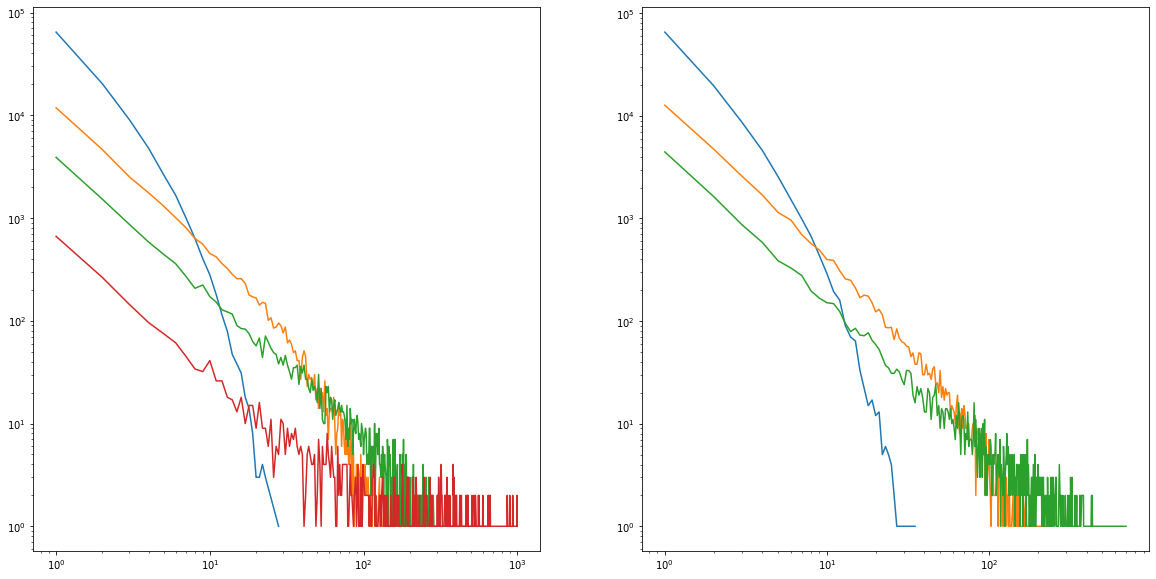

In [11]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
name = [427, 807, 902, 950]

for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/2D_r45/r45_2D_100_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0].loglog(size, amount, label="Time {}".format(name[i]))

name = [427, 807, 902]

for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/1 over r/r45_2D_100_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[1].loglog(size, amount, label="Time {}".format(name[i]))

<font size="7"> Pref Attach Unit </font>

/tmp/ipykernel_3478/3339174430.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /


3
1.1719910311956632 0.024824767039754364
------------------------------------
4


Calculating best minimal value for power law fit


1.221186635858441 0.02090017256472986
------------------------------------
7


Calculating best minimal value for power law fit


1.3965455858693956 0.023869239321141666
------------------------------------
9
1.617308527108679 0.04061591917242738
------------------------------------


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


10
1.7828218658175263 0.08206202917908731
83.04259445222372 0.00010154374698234841


Assuming nested distributions


-0.3963407495932736 0.37329052870303847
-0.05503837527174893 0.8145855063825029
0.2394951693718279 0.7904746117610506
------------------------------------


Calculating best minimal value for power law fit
Assuming nested distributions


10
1.9032293667840272 0.10953264951206765
41.074885877591655 0.0018681684974742715
-0.33306250131377135 0.41440587850430777
-0.046900741566597404 0.8245290912802445
0.10061728774639933 0.8860339900653316
------------------------------------


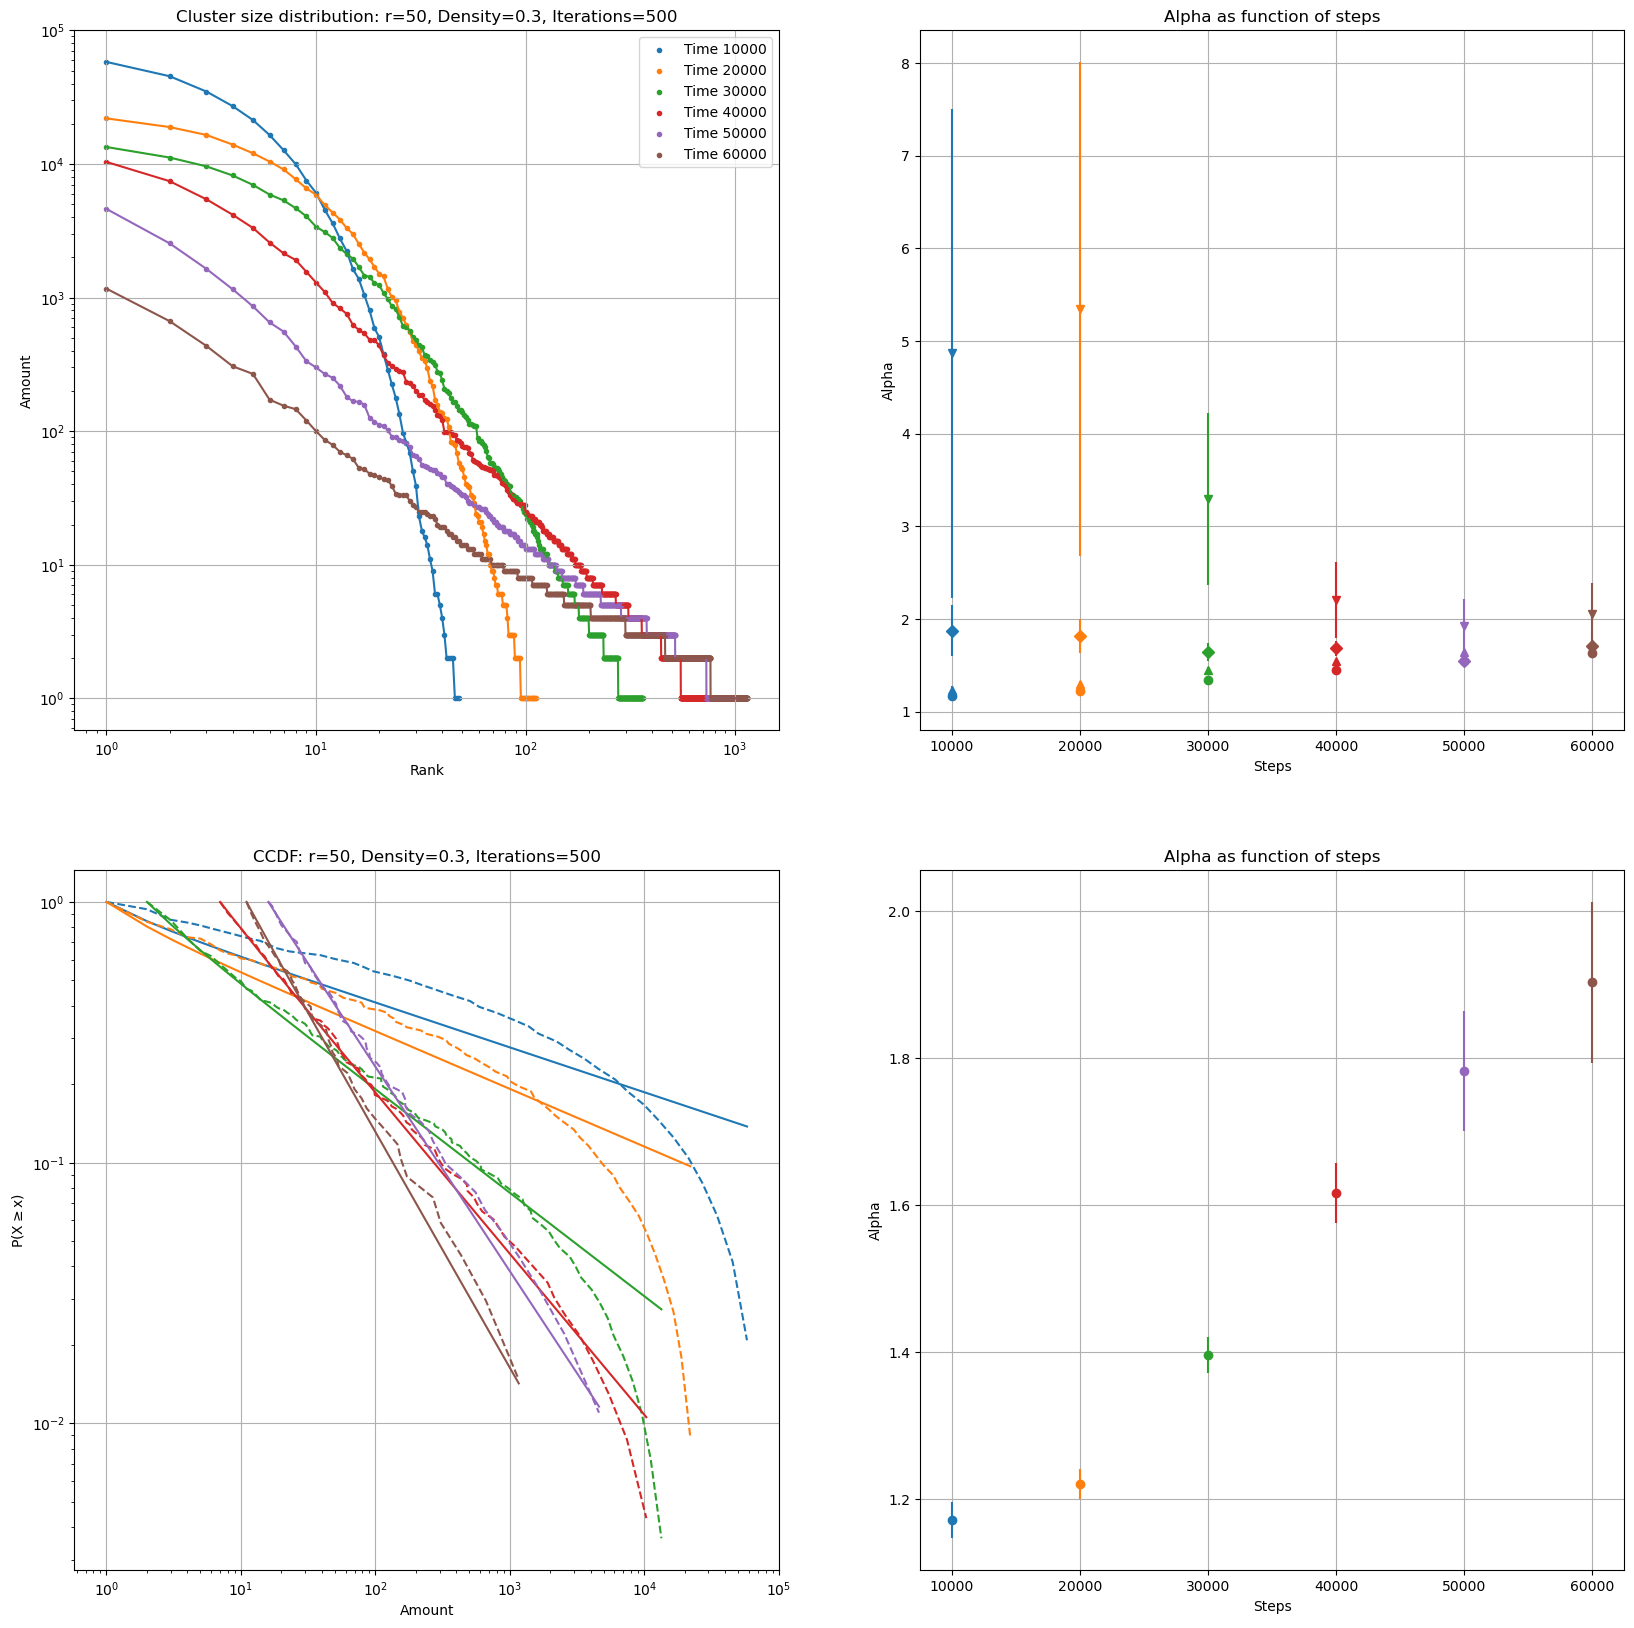

In [2]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
name = [ 10000, 20000, 30000, 40000, 50000, 60000]

upper_lim = [11] * len(name)
lower_lim = [1] * len(name)
upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/True/r50_2D_0.3/r50_2D_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]

    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 0].plot(ranks, ccdf, c=cmap(i))

    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[1,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))



    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[0,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[0,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[0,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[0,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))

    print(result.power_law.alpha, result.power_law.sigma)
    if i == 4  or i == 5:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)

    print('------------------------------------')

    

ax[0,0].set_xlabel("Rank")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0,0].legend()

ax[1,1].set_xlabel("Steps")
ax[1,1].set_ylabel("Alpha")

ax[1,1].set_title("Alpha as function of steps")

ax[0,1].set_xlabel("Steps")
ax[0,1].set_ylabel("Alpha")
ax[0,1].set_title("Alpha as function of steps")


ax[1,0].set_xlabel("Amount")
ax[1,0].set_ylabel("P(X" + r'$ \geq$' +"x)")
ax[1,0].set_title("CCDF: r=50, Density=0.3, Iterations=500")


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

/tmp/ipykernel_6061/1345288808.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for 

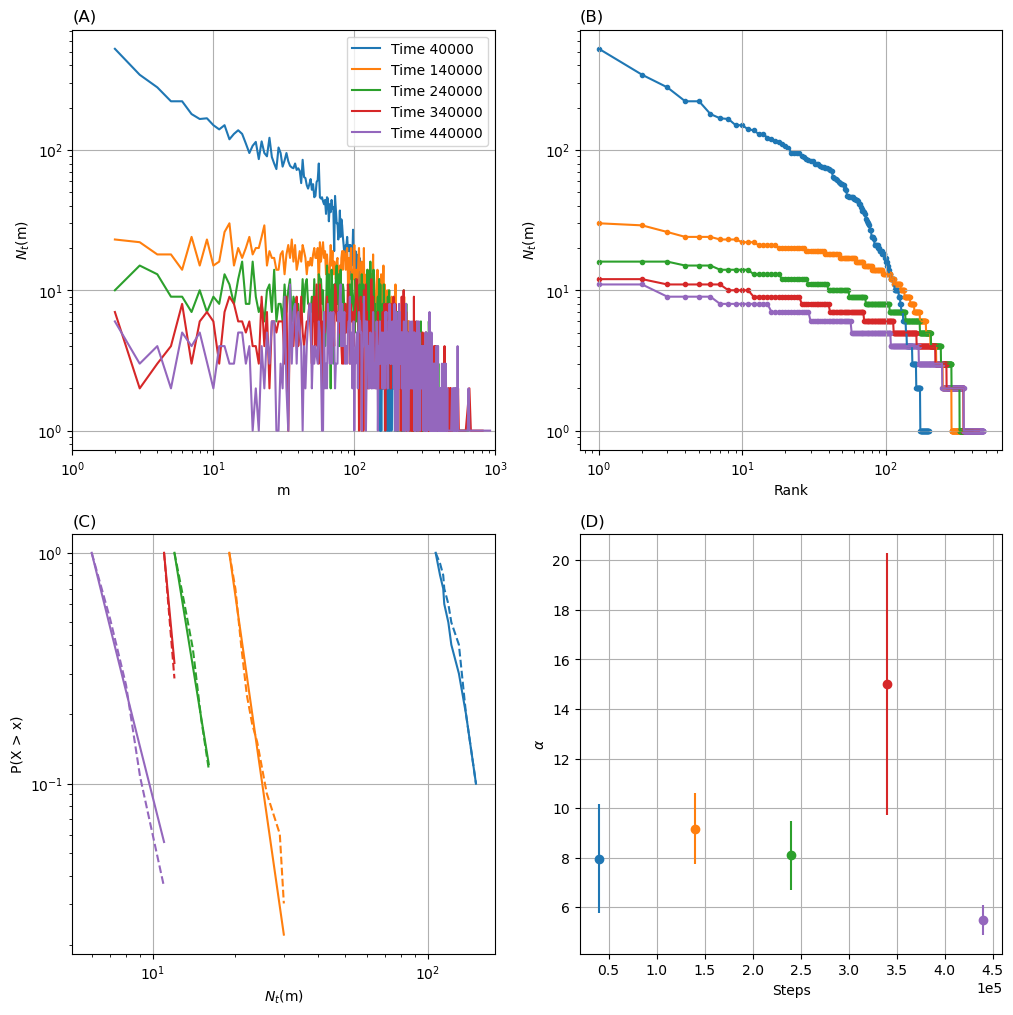

In [29]:

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
name = [40000, 140000, 240000, 340000, 440000]
xmax = [100] * len(name)
xmin = [10] * len(name)
upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/True/oneoverrsquared/r50_2D_c0.00000_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
  
    amount = amount[10:]
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[1,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))


    

ax[0,0].set_xlabel("m")
ax[0,0].set_ylabel(r"$N_t$(m)")
ax[0,0].set_title("(A)", loc='left')

ax[0,0].legend()

ax[1,1].set_xlabel("Steps")
ax[1,1].set_ylabel(r"$\alpha$")
ax[1,1].set_title("(D)", loc='left')


ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel(r"$N_t$(m)")
ax[0,1].set_title("(B)", loc='left')


ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel(r"$N_t$(m)")
ax[1,0].set_ylabel("P(X > x)")
ax[1,0].set_title("(C)", loc='left')



ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

fig.savefig('finalplot/oneoverrsquared.png', bbox_inches='tight', pad_inches=0.2)




<font size="7"> Frutsels </font>

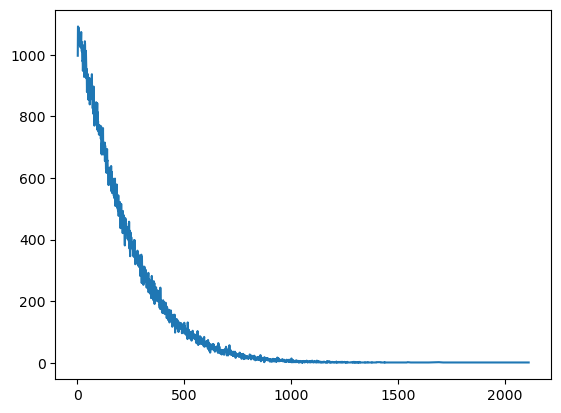

In [28]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/3D_c0.00_r80.000000_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Time {}".format(100000))

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r80.000000_0.100000_1.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Time {}".format(100000))

10000000.0
10000000.0


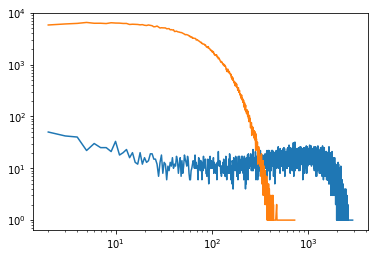

In [30]:
size, amount = np.loadtxt("Pref_growth/3D_c0.00_r15.000000_0.300000_1.txt", skiprows=1, unpack=True)
print(sum(amount*size)/3)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r15.000000_0.300000_1_5000.txt", skiprows=1, unpack=True)
print(sum(amount*size)/3)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")





1000.0
1000.0
1000.0


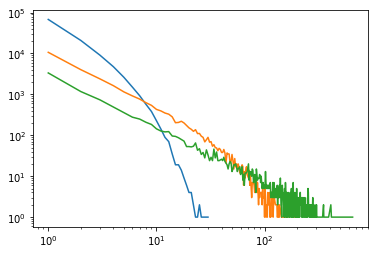

In [51]:

size, amount = np.loadtxt("Pref_attach/False/r45_2D_tree_405_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/200)


size, amount = np.loadtxt("Pref_attach/False/r45_2D_tree_810_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/200)


size, amount = np.loadtxt("Pref_attach/False/r45_2D_tree_900_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/200)


1000.0
1000.0
1000.0
1000.0
1000.0
600.0


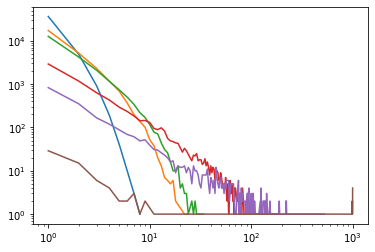

In [57]:
size, amount = np.loadtxt("Pref_attach/r99_2D_tree_100_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_400_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_500_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_800_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_900_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_950_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)


In [123]:
lijst = [1,2,3,4,5,6,7,8]
print(lijst[2:-1])

[3, 4, 5, 6, 7]
